<a href="https://colab.research.google.com/github/trilgar/MSM-2021/blob/main/autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torchvision.utils import save_image
import numpy as np
from sklearn.metrics import mean_squared_error
import torch.nn.functional as F
import pandas as pd

In [122]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [123]:
epochs = 20

## Завантаження даних

In [124]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)
loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 32,
                                     shuffle = True)
loader = DeviceDataLoader(loader, device)

# Звичайний автоенкодер

## Проектування моделі автоенкодера

In [125]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
          
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
			      torch.nn.Linear(18, 9)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
			      torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Tanh()
        )
  
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded,encoded

## Визначення функції втрат та оптимізатора

In [126]:
# Model Initialization
model = AE()
model.to(device)
  
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
  
# Using an Adam Optimizer with lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-3,
                             weight_decay = 1e-8)

## Навчання

Epoch [1/20], Step [500/1875], Loss: 0.0530
Epoch [1/20], Step [1000/1875], Loss: 0.0443
Epoch [1/20], Step [1500/1875], Loss: 0.0380
Loss for epoch =  0.04677730345527331


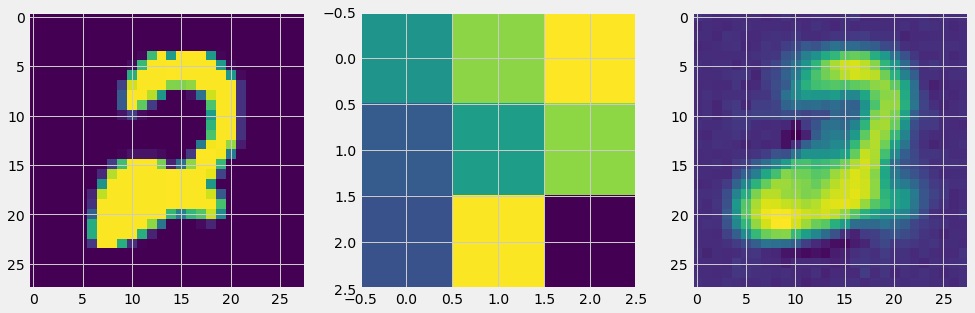

Epoch [2/20], Step [500/1875], Loss: 0.0325
Epoch [2/20], Step [1000/1875], Loss: 0.0340
Epoch [2/20], Step [1500/1875], Loss: 0.0349
Loss for epoch =  0.034220069124301276


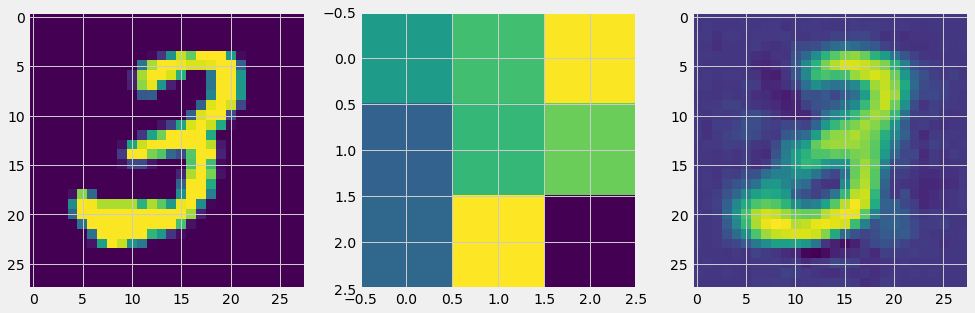

Epoch [3/20], Step [500/1875], Loss: 0.0313
Epoch [3/20], Step [1000/1875], Loss: 0.0326
Epoch [3/20], Step [1500/1875], Loss: 0.0308
Loss for epoch =  0.031095605887969335


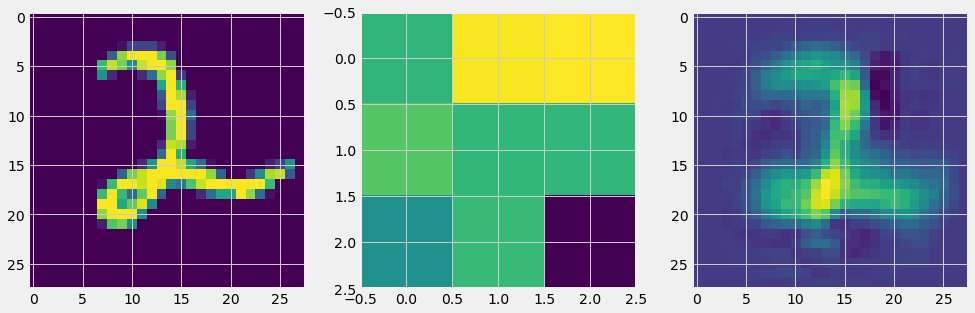

Epoch [4/20], Step [500/1875], Loss: 0.0317
Epoch [4/20], Step [1000/1875], Loss: 0.0269
Epoch [4/20], Step [1500/1875], Loss: 0.0287
Loss for epoch =  0.029718445950746537


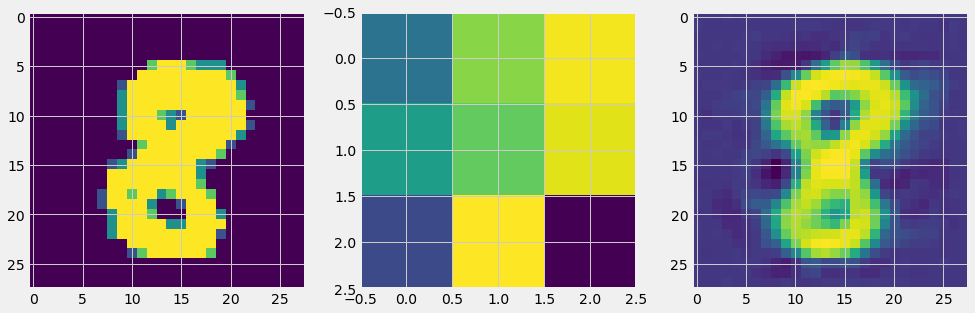

Epoch [5/20], Step [500/1875], Loss: 0.0277
Epoch [5/20], Step [1000/1875], Loss: 0.0256
Epoch [5/20], Step [1500/1875], Loss: 0.0275
Loss for epoch =  0.028298985909422238


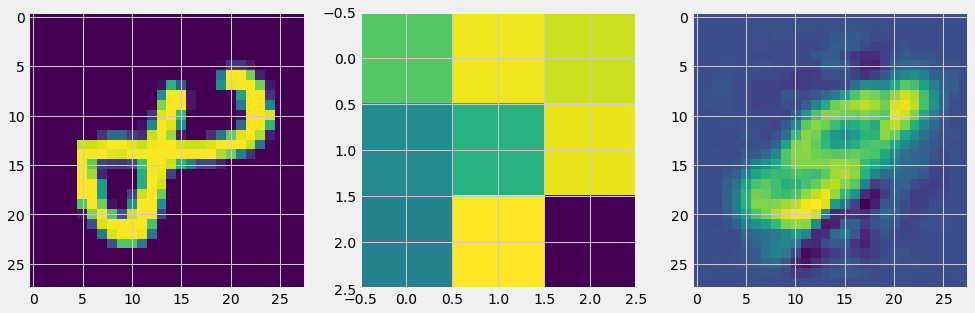

Epoch [6/20], Step [500/1875], Loss: 0.0255
Epoch [6/20], Step [1000/1875], Loss: 0.0260
Epoch [6/20], Step [1500/1875], Loss: 0.0315
Loss for epoch =  0.027240356436371804


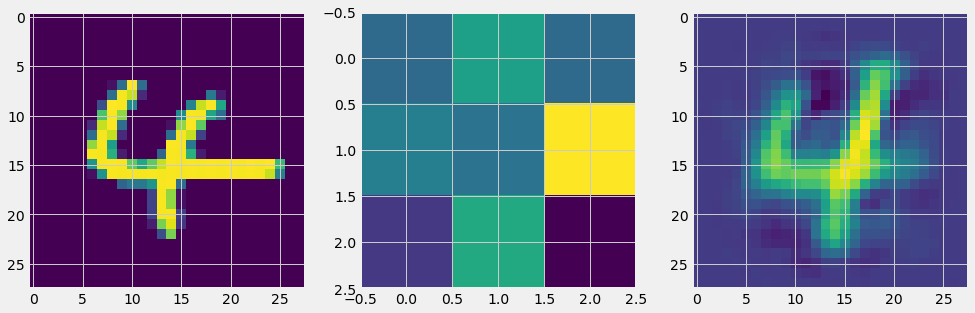

Epoch [7/20], Step [500/1875], Loss: 0.0257
Epoch [7/20], Step [1000/1875], Loss: 0.0263
Epoch [7/20], Step [1500/1875], Loss: 0.0214
Loss for epoch =  0.02622867364982764


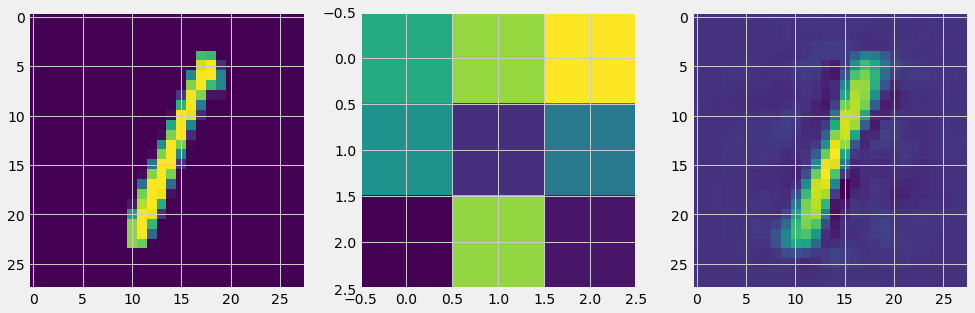

Epoch [8/20], Step [500/1875], Loss: 0.0262
Epoch [8/20], Step [1000/1875], Loss: 0.0257
Epoch [8/20], Step [1500/1875], Loss: 0.0275
Loss for epoch =  0.025509109979867935


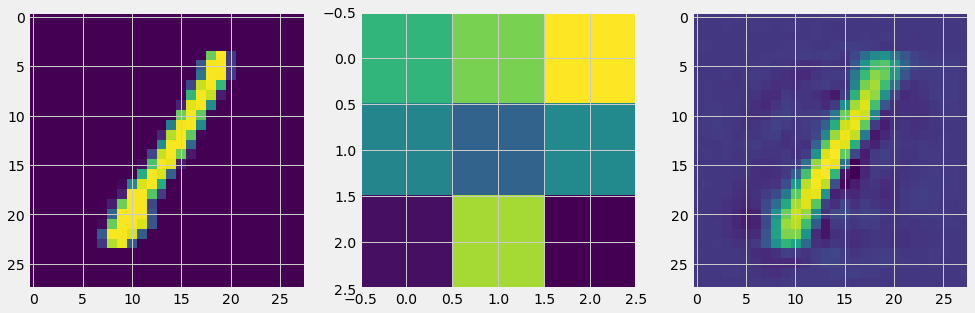

Epoch [9/20], Step [500/1875], Loss: 0.0272
Epoch [9/20], Step [1000/1875], Loss: 0.0265
Epoch [9/20], Step [1500/1875], Loss: 0.0237
Loss for epoch =  0.02503159798781077


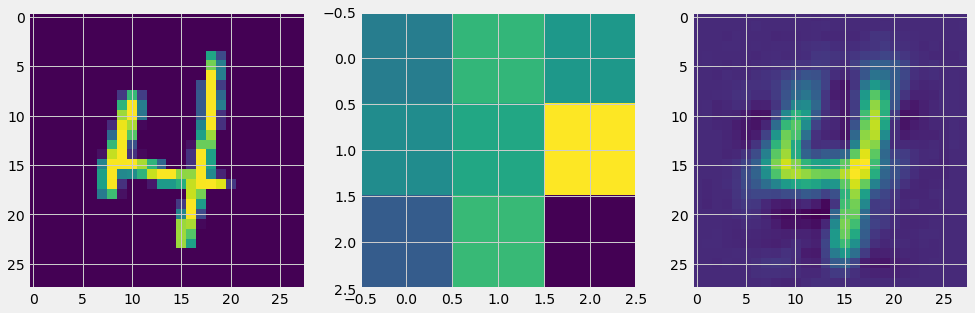

Epoch [10/20], Step [500/1875], Loss: 0.0254
Epoch [10/20], Step [1000/1875], Loss: 0.0219
Epoch [10/20], Step [1500/1875], Loss: 0.0248
Loss for epoch =  0.024676208166281383


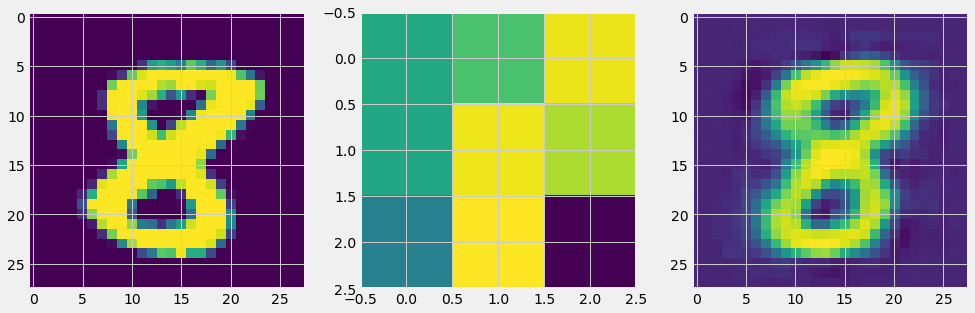

Epoch [11/20], Step [500/1875], Loss: 0.0250
Epoch [11/20], Step [1000/1875], Loss: 0.0264
Epoch [11/20], Step [1500/1875], Loss: 0.0198
Loss for epoch =  0.024348580932617186


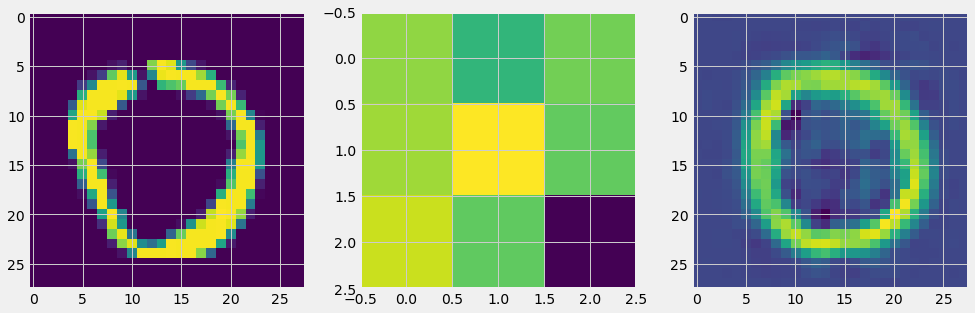

Epoch [12/20], Step [500/1875], Loss: 0.0240
Epoch [12/20], Step [1000/1875], Loss: 0.0236
Epoch [12/20], Step [1500/1875], Loss: 0.0264
Loss for epoch =  0.024029382854700087


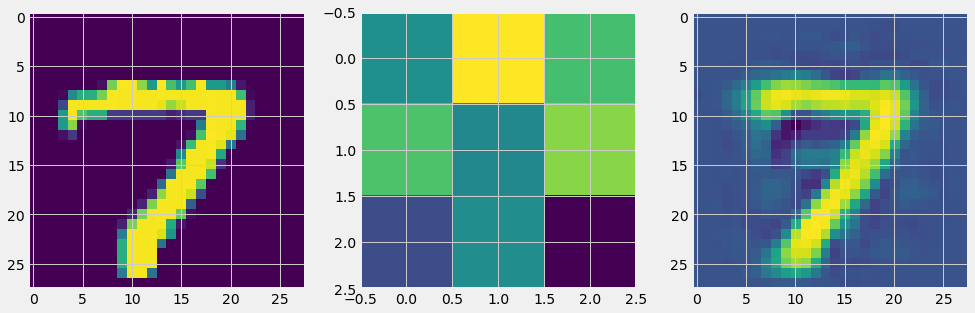

Epoch [13/20], Step [500/1875], Loss: 0.0230
Epoch [13/20], Step [1000/1875], Loss: 0.0262
Epoch [13/20], Step [1500/1875], Loss: 0.0243
Loss for epoch =  0.023655380791425706


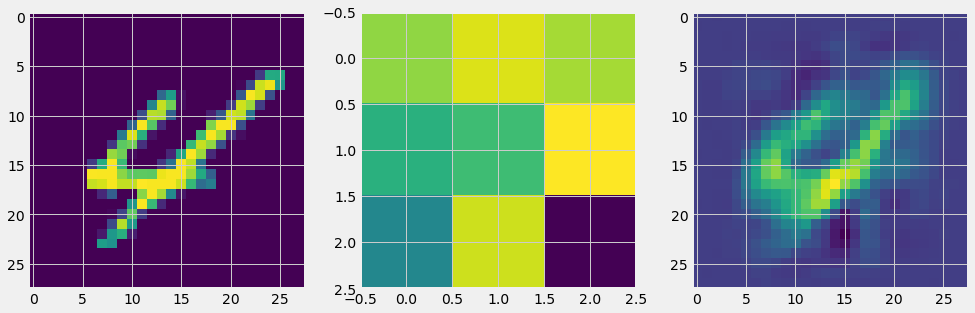

Epoch [14/20], Step [500/1875], Loss: 0.0230
Epoch [14/20], Step [1000/1875], Loss: 0.0266
Epoch [14/20], Step [1500/1875], Loss: 0.0207
Loss for epoch =  0.023358409612377486


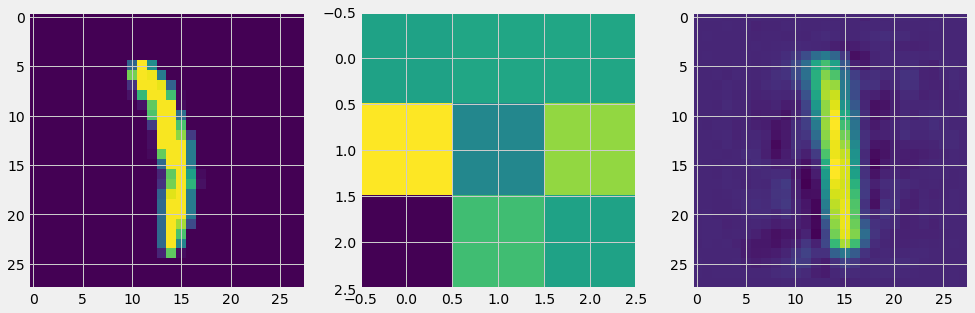

Epoch [15/20], Step [500/1875], Loss: 0.0255
Epoch [15/20], Step [1000/1875], Loss: 0.0252
Epoch [15/20], Step [1500/1875], Loss: 0.0231
Loss for epoch =  0.02306795684695244


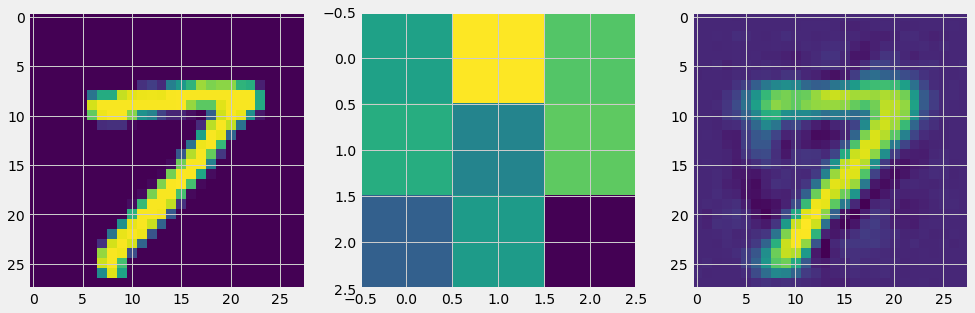

Epoch [16/20], Step [500/1875], Loss: 0.0217
Epoch [16/20], Step [1000/1875], Loss: 0.0200
Epoch [16/20], Step [1500/1875], Loss: 0.0221
Loss for epoch =  0.022859105011820792


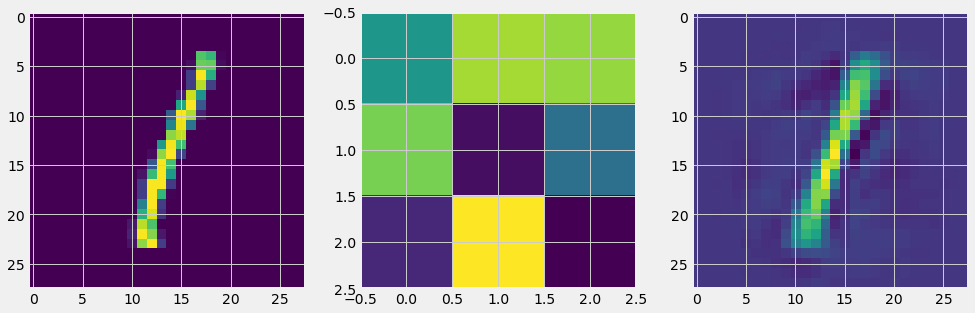

Epoch [17/20], Step [500/1875], Loss: 0.0260
Epoch [17/20], Step [1000/1875], Loss: 0.0228
Epoch [17/20], Step [1500/1875], Loss: 0.0234
Loss for epoch =  0.022666548282901447


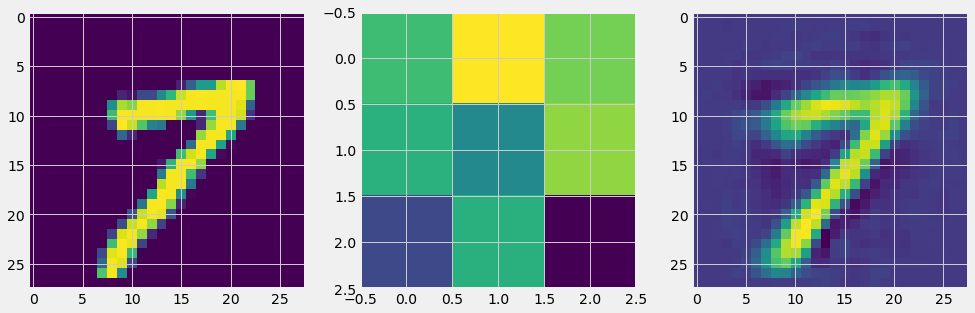

Epoch [18/20], Step [500/1875], Loss: 0.0189
Epoch [18/20], Step [1000/1875], Loss: 0.0193
Epoch [18/20], Step [1500/1875], Loss: 0.0228
Loss for epoch =  0.022489678235848746


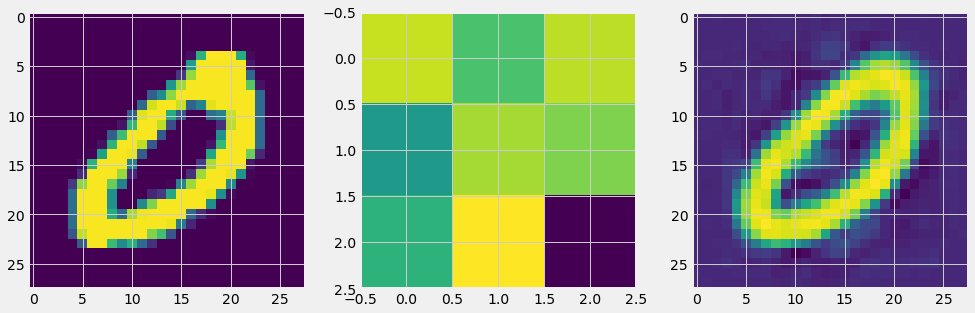

Epoch [19/20], Step [500/1875], Loss: 0.0216
Epoch [19/20], Step [1000/1875], Loss: 0.0217
Epoch [19/20], Step [1500/1875], Loss: 0.0225
Loss for epoch =  0.022355961790680886


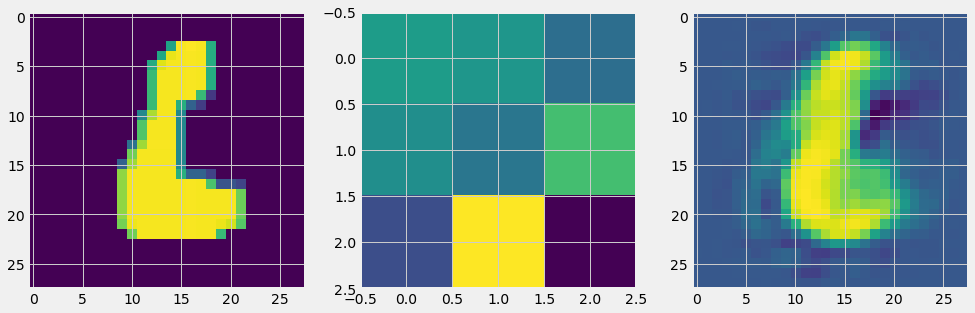

Epoch [20/20], Step [500/1875], Loss: 0.0203
Epoch [20/20], Step [1000/1875], Loss: 0.0202
Epoch [20/20], Step [1500/1875], Loss: 0.0189
Loss for epoch =  0.022211321197946866


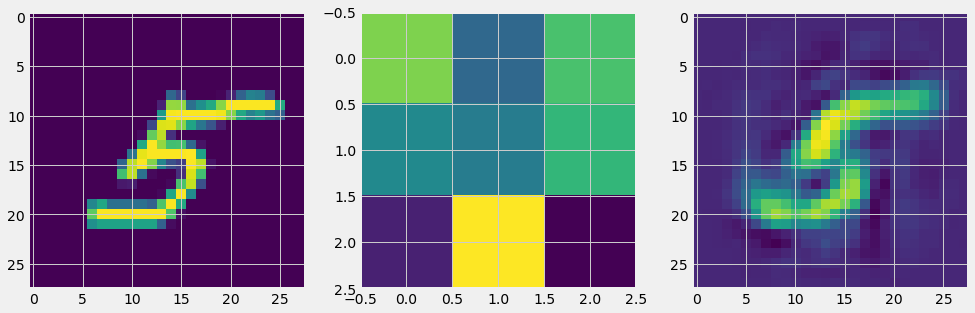

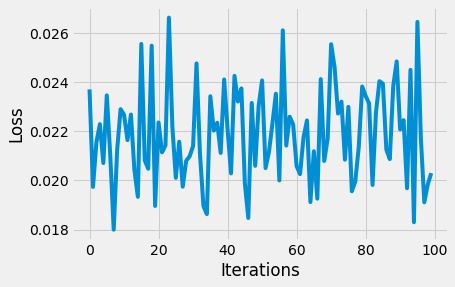

In [127]:
outputs = []
losses = []
total_step = len(loader)
for epoch in range(epochs):
    mse = []
    for i, (image, _) in enumerate(loader):
        # Reshaping the image to (-1, 784)
        image = image.reshape(-1, 28 * 28)

        # Output of Autoencoder
        reconstructed, encoded = model(image)

        # Calculating the loss function
        loss = loss_function(reconstructed, image)

        # The gradients are set to zero,
        # the the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mse.append(loss.item())
        # Storing the losses in a list for plotting
        losses.append(loss)
        if (i + 1) % 500 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, epochs, i + 1, total_step, loss.item()))
    outputs.append((epochs, image, reconstructed))
    fig, (ax1,ax2, ax3) = plt.subplots(ncols = 3, figsize = (15, 8))
    enc = encoded[-1].cpu()
    rec = reconstructed[-1].cpu()
    ax1.imshow(image[-1].reshape(28,28).cpu())
    ax2.imshow(enc.reshape(3,3).detach().numpy())
    ax3.imshow(rec.reshape(28,28).detach().numpy())
    print('Loss for epoch = ', sum(mse)/len(mse))
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses[-100:])

## Збереження моделі

In [128]:
torch.save(model.state_dict(),'perceptron_autoencoder.ckpt')
model.eval()

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=36, bias=True)
    (5): ReLU()
    (6): Linear(in_features=36, out_features=18, bias=True)
    (7): ReLU()
    (8): Linear(in_features=18, out_features=9, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=9, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=36, bias=True)
    (3): ReLU()
    (4): Linear(in_features=36, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=784, bias=True)
    (9): Tanh()
  )
)

## Демонстрація енкодингу та декодингу

In [129]:
MAE = {"mae_train": [], "mae_test": []}

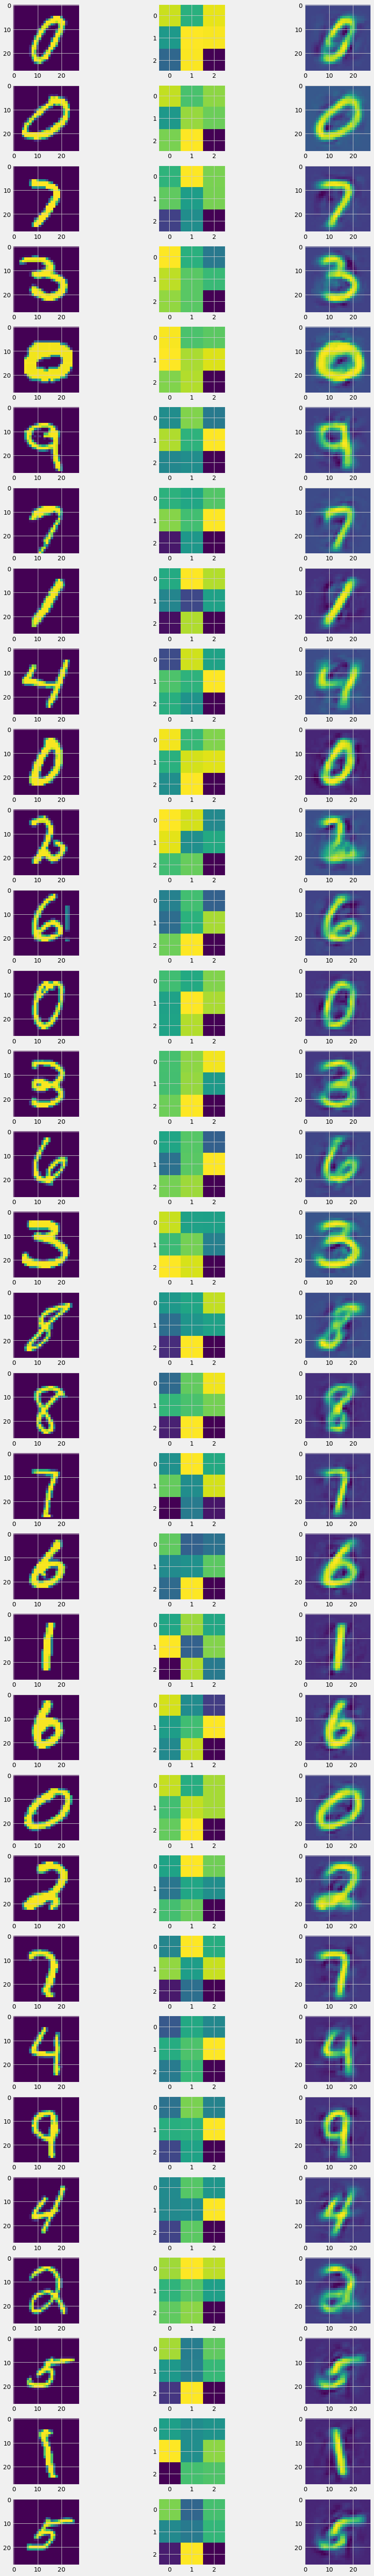

{'mae_test': [], 'mae_train': [0.02004172606393695]}

In [130]:
mae = []
fig, ax = plt.subplots(nrows = len(image), ncols = 3, figsize = (15, 100))
for i, item in enumerate(image):
  item = item.reshape(-1, 28, 28)
  ax[i,0].imshow(item[0].cpu())
  rec, enc = model(item.reshape(-1, 28 * 28))
  ax[i, 1].imshow(enc.reshape(3,3).cpu().detach().numpy())
  ax[i, 2].imshow(rec.reshape(28,28).cpu().detach().numpy())
  mae.append(mean_squared_error(item.reshape(-1, 28 * 28).cpu().detach().numpy(), rec.reshape(-1, 28 * 28).cpu().detach().numpy()))
MAE['mae_train'].append(sum(mae)/len(mae))
plt.show()
MAE

##  Тестування на власних числах написаних від руки

In [131]:
test_numbers = np.zeros((10, 28 ,28))
for i in range(0, 10):
  image = plt.imread("/content/drive/MyDrive/numbers datasets/"+str(i)+".png")
  test_numbers[i] = image
test_numbers = 1 - test_numbers

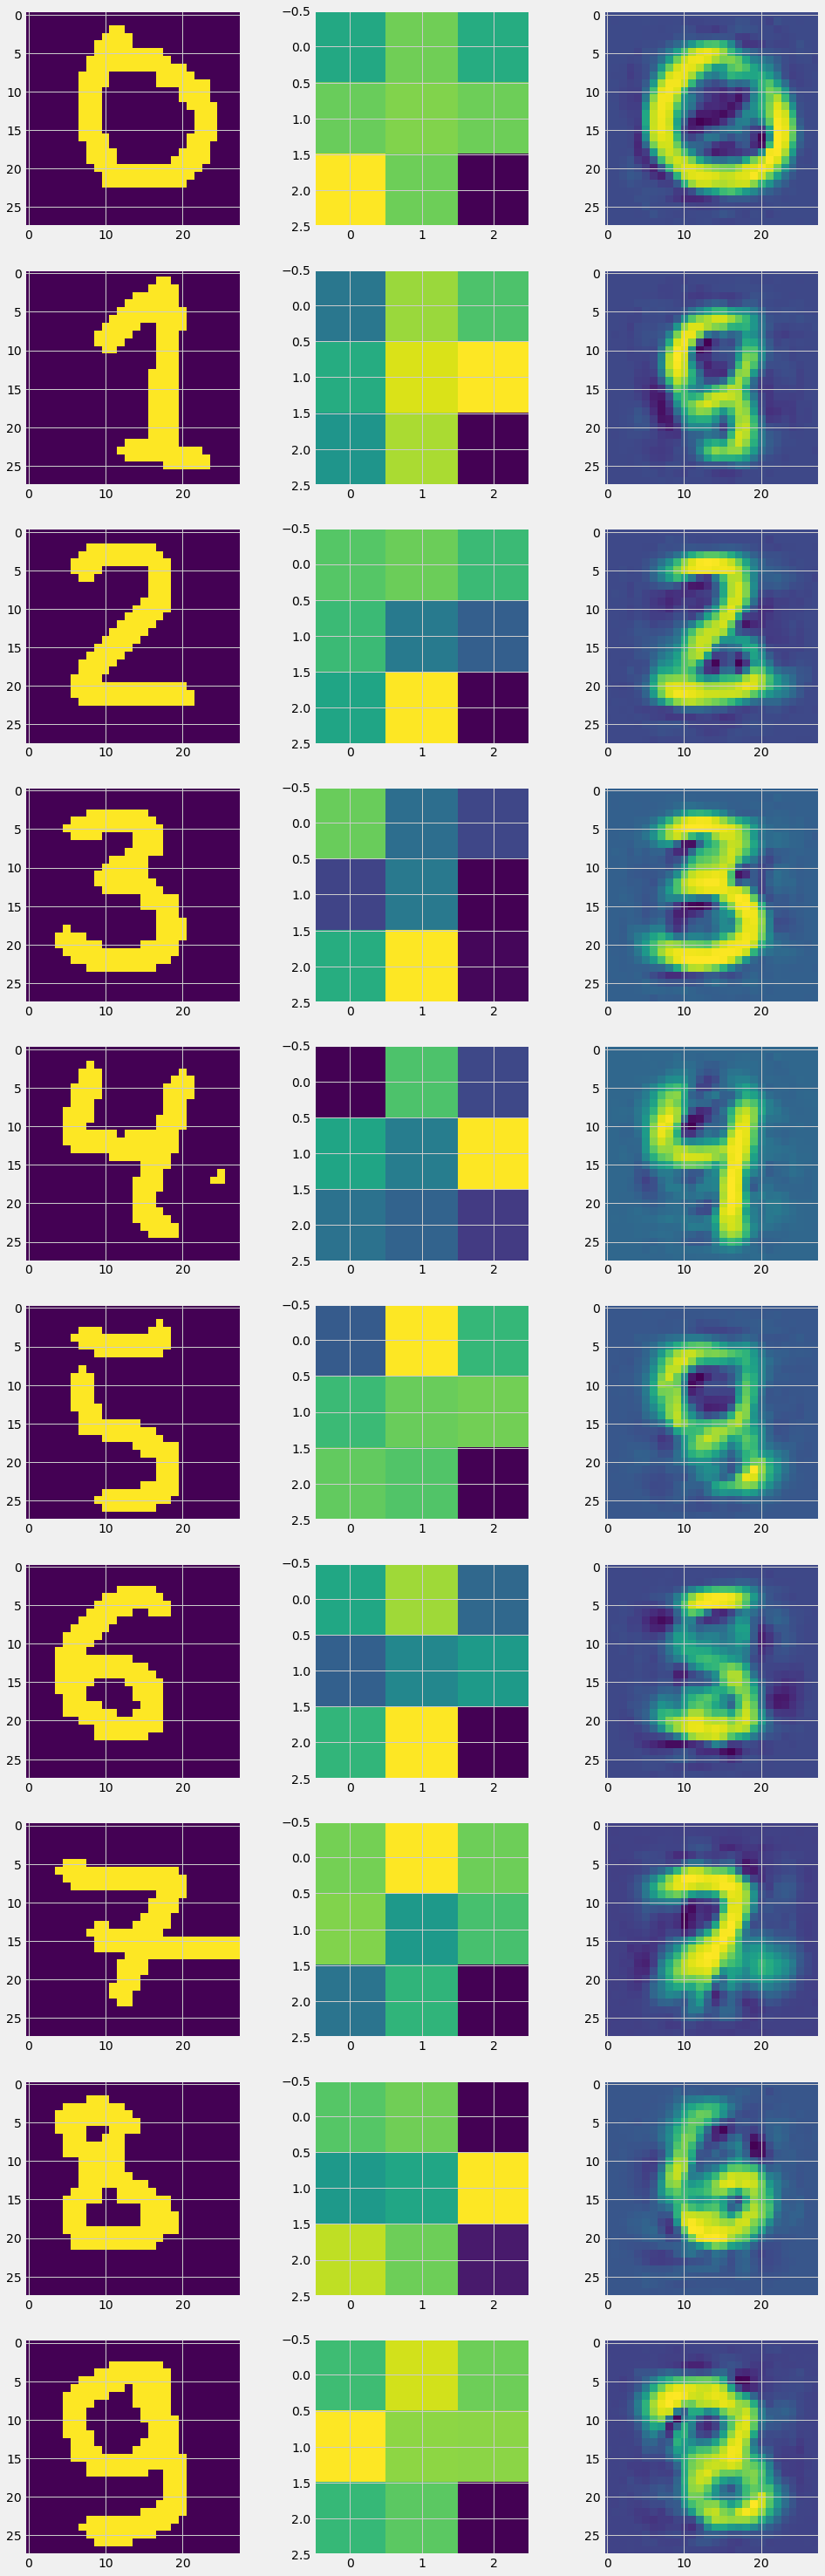

{'mae_test': [0.09836459712958256], 'mae_train': [0.02004172606393695]}

In [132]:
fig, ax = plt.subplots(nrows = len(test_numbers), ncols = 3, figsize = (15, 50))
model = model.cpu()
mae = []
for i, item in enumerate(test_numbers):
  image = torch.tensor(item)
  ax[i,0].imshow(image)
  rec, enc = model(image.reshape(-1, 28*28).float())
  ax[i, 1].imshow(enc.reshape(3,3).cpu().detach().numpy())
  ax[i, 2].imshow(rec.reshape(28,28).cpu().detach().numpy())
  mae.append(mean_squared_error(item.reshape(-1, 28 * 28), rec.reshape(-1, 28 * 28).cpu().detach().numpy()))
MAE['mae_test'].append(sum(mae)/len(mae))
plt.show()
MAE

# Згортковий автоенкодер

## Проектування моделі

In [133]:
class AE_conv(torch.nn.Module):
    def __init__(self):
        super().__init__()
          
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            nn.Conv2d(1, 8, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(8, 16, 3, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.Conv2d(16, 32, 3, stride=2, padding=0),
            nn.ReLU(True),
            nn.Flatten(start_dim=1),
            nn.Linear(3 * 3 * 32, 128),
            nn.ReLU(True),
            nn.Linear(128, 9)
        )
        self.decoder = torch.nn.Sequential(
            nn.Linear(9, 128),
            nn.ReLU(True),
            nn.Linear(128, 3 * 3 * 32),
            nn.ReLU(True),
            nn.Unflatten(dim=1, unflattened_size=(32, 3, 3)),
            nn.ConvTranspose2d(32, 16, 3, stride=2, output_padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 3, stride=2, padding=1, output_padding=1)
        )
  
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

## Визначення функції втрат та оптимізатора

In [134]:
# Model Initialization
model = AE_conv()
model.to(device)
  
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
  
# Using an Adam Optimizer with lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-3,
                             weight_decay = 1e-8)

## Навчання

Epoch [1/20], Step [500/1875], Loss: 0.0345
Epoch [1/20], Step [1000/1875], Loss: 0.0266
Epoch [1/20], Step [1500/1875], Loss: 0.0264
Loss for epoch =  0.036728176648418105


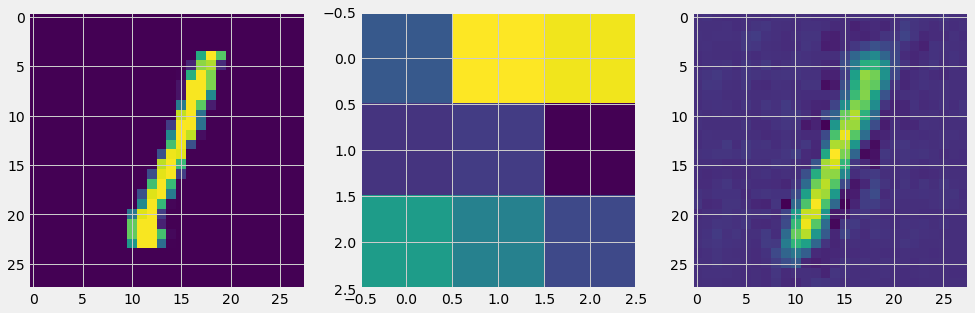

Epoch [2/20], Step [500/1875], Loss: 0.0209
Epoch [2/20], Step [1000/1875], Loss: 0.0218
Epoch [2/20], Step [1500/1875], Loss: 0.0217
Loss for epoch =  0.021705807715654373


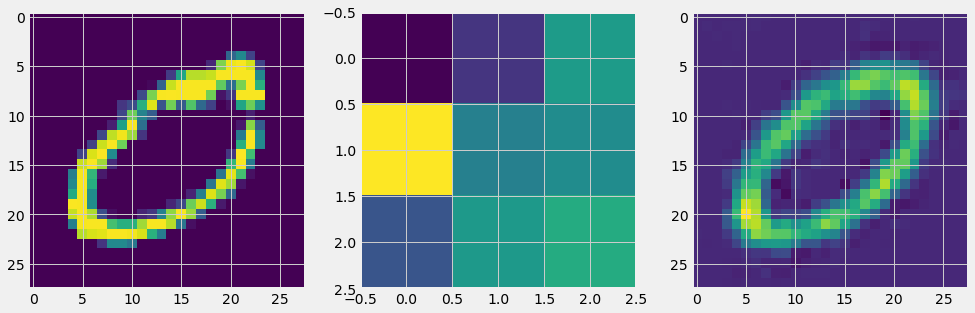

Epoch [3/20], Step [500/1875], Loss: 0.0210
Epoch [3/20], Step [1000/1875], Loss: 0.0201
Epoch [3/20], Step [1500/1875], Loss: 0.0234
Loss for epoch =  0.019457735606034598


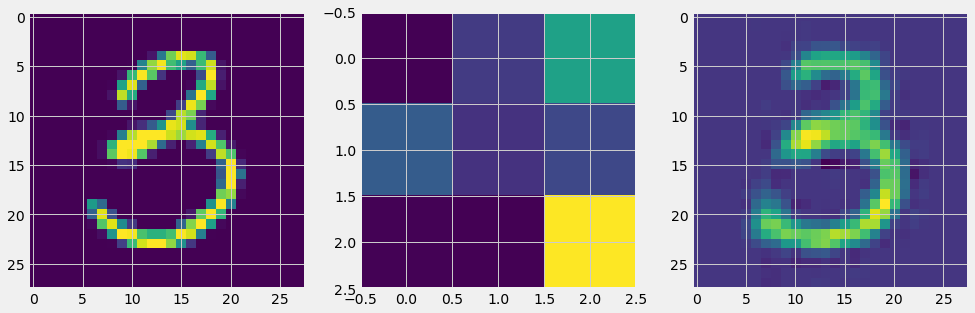

Epoch [4/20], Step [500/1875], Loss: 0.0168
Epoch [4/20], Step [1000/1875], Loss: 0.0166
Epoch [4/20], Step [1500/1875], Loss: 0.0163
Loss for epoch =  0.01838414500405391


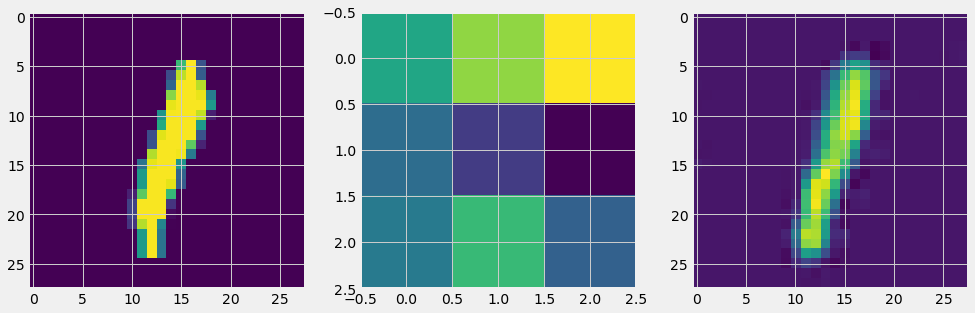

Epoch [5/20], Step [500/1875], Loss: 0.0207
Epoch [5/20], Step [1000/1875], Loss: 0.0173
Epoch [5/20], Step [1500/1875], Loss: 0.0200
Loss for epoch =  0.017630990755558015


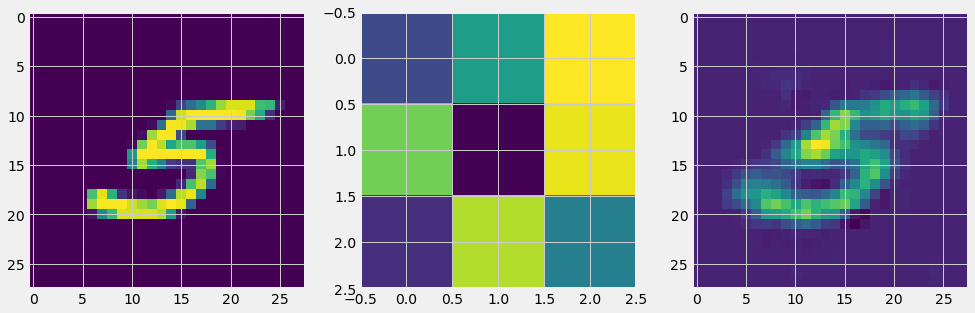

Epoch [6/20], Step [500/1875], Loss: 0.0166
Epoch [6/20], Step [1000/1875], Loss: 0.0183
Epoch [6/20], Step [1500/1875], Loss: 0.0163
Loss for epoch =  0.017082882890601954


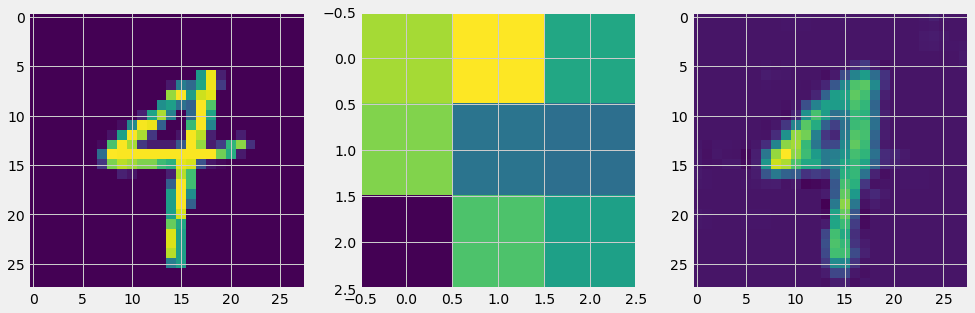

Epoch [7/20], Step [500/1875], Loss: 0.0170
Epoch [7/20], Step [1000/1875], Loss: 0.0166
Epoch [7/20], Step [1500/1875], Loss: 0.0156
Loss for epoch =  0.01663281997392575


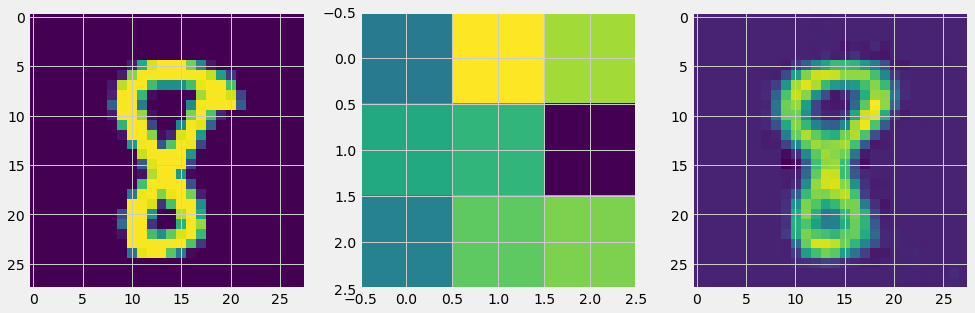

Epoch [8/20], Step [500/1875], Loss: 0.0199
Epoch [8/20], Step [1000/1875], Loss: 0.0150
Epoch [8/20], Step [1500/1875], Loss: 0.0170
Loss for epoch =  0.01627116613686085


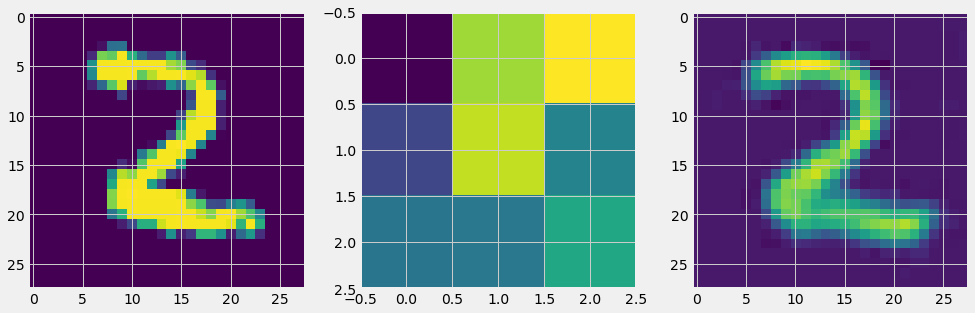

Epoch [9/20], Step [500/1875], Loss: 0.0142
Epoch [9/20], Step [1000/1875], Loss: 0.0151
Epoch [9/20], Step [1500/1875], Loss: 0.0177
Loss for epoch =  0.015983995318909486


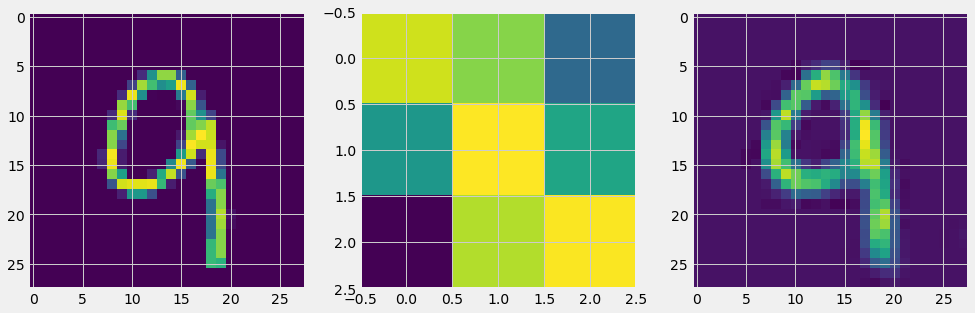

Epoch [10/20], Step [500/1875], Loss: 0.0162
Epoch [10/20], Step [1000/1875], Loss: 0.0160
Epoch [10/20], Step [1500/1875], Loss: 0.0172
Loss for epoch =  0.015726655624310176


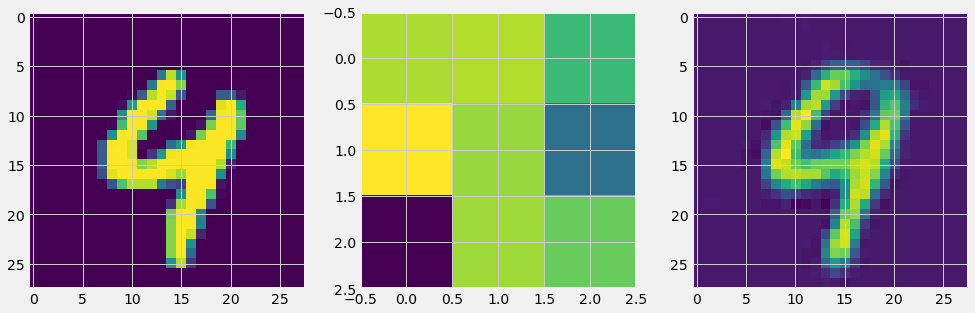

Epoch [11/20], Step [500/1875], Loss: 0.0170
Epoch [11/20], Step [1000/1875], Loss: 0.0150
Epoch [11/20], Step [1500/1875], Loss: 0.0178
Loss for epoch =  0.015529624366760255


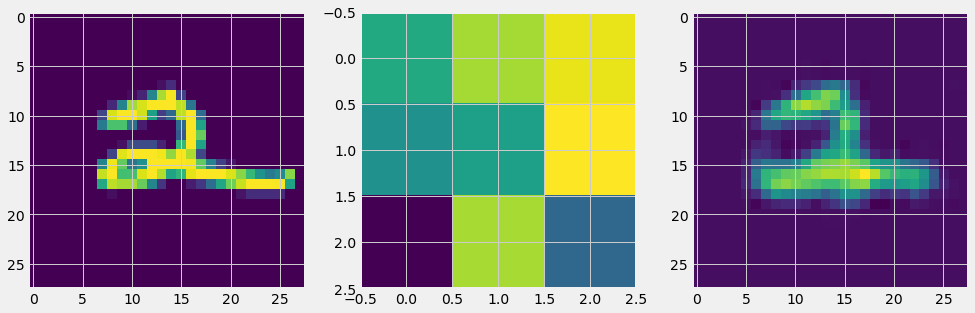

Epoch [12/20], Step [500/1875], Loss: 0.0155
Epoch [12/20], Step [1000/1875], Loss: 0.0178
Epoch [12/20], Step [1500/1875], Loss: 0.0167
Loss for epoch =  0.015349833750228086


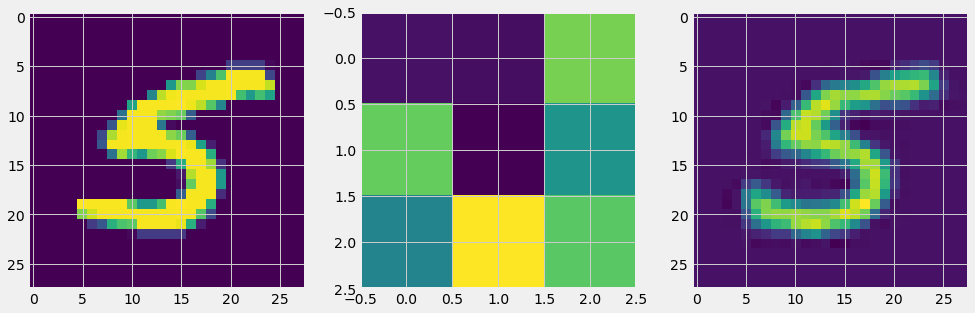

Epoch [13/20], Step [500/1875], Loss: 0.0161
Epoch [13/20], Step [1000/1875], Loss: 0.0130
Epoch [13/20], Step [1500/1875], Loss: 0.0170
Loss for epoch =  0.015196943673988184


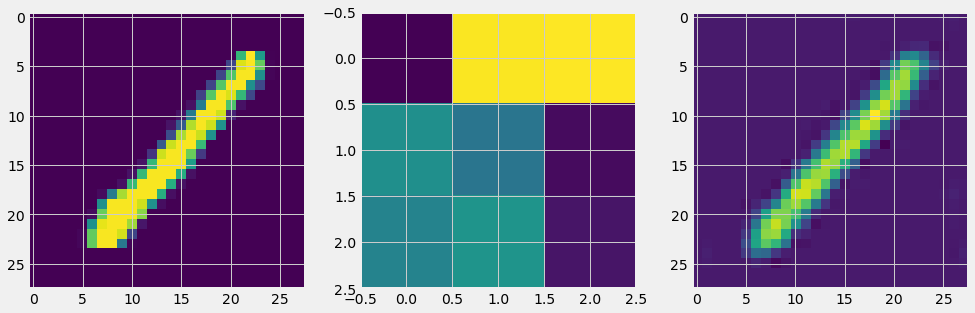

Epoch [14/20], Step [500/1875], Loss: 0.0136
Epoch [14/20], Step [1000/1875], Loss: 0.0153
Epoch [14/20], Step [1500/1875], Loss: 0.0136
Loss for epoch =  0.015080069496234258


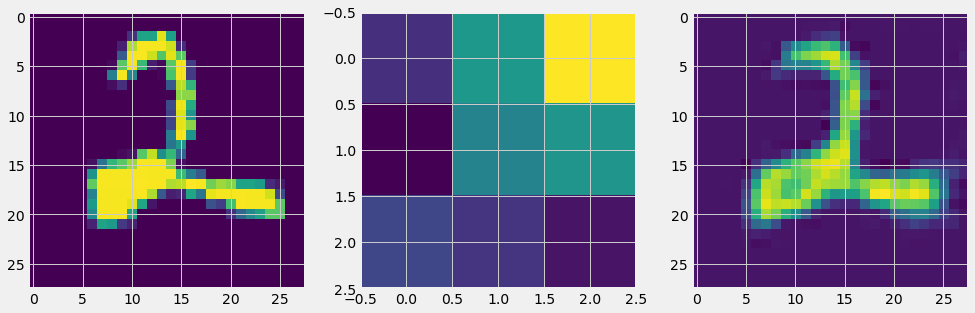

Epoch [15/20], Step [500/1875], Loss: 0.0146
Epoch [15/20], Step [1000/1875], Loss: 0.0145
Epoch [15/20], Step [1500/1875], Loss: 0.0170
Loss for epoch =  0.014946246270338694


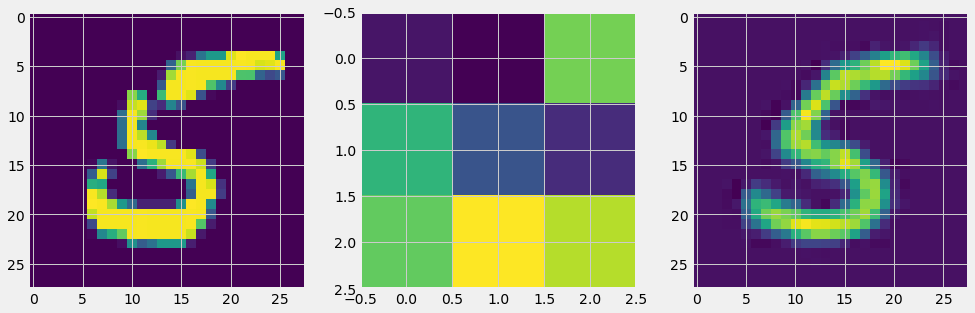

Epoch [16/20], Step [500/1875], Loss: 0.0134
Epoch [16/20], Step [1000/1875], Loss: 0.0162
Epoch [16/20], Step [1500/1875], Loss: 0.0122
Loss for epoch =  0.014827939990659554


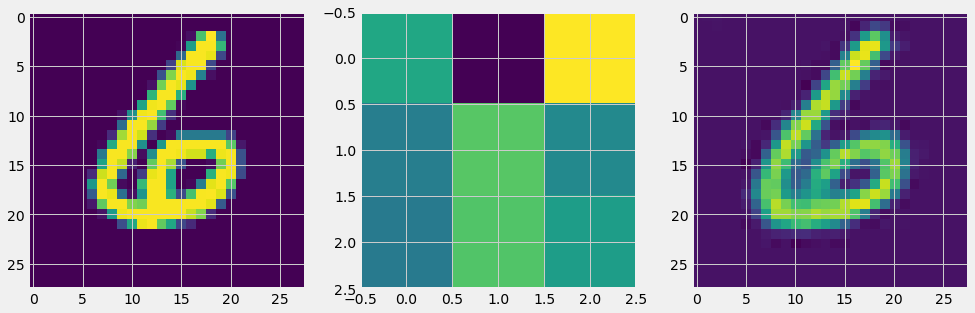

Epoch [17/20], Step [500/1875], Loss: 0.0168
Epoch [17/20], Step [1000/1875], Loss: 0.0135
Epoch [17/20], Step [1500/1875], Loss: 0.0111
Loss for epoch =  0.01471370902111133


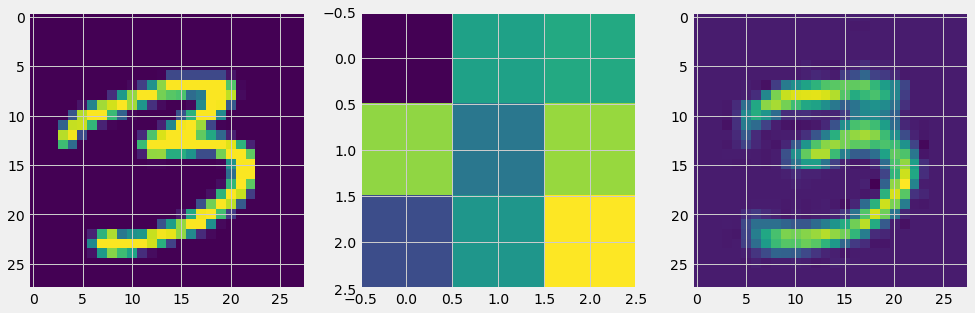

Epoch [18/20], Step [500/1875], Loss: 0.0156
Epoch [18/20], Step [1000/1875], Loss: 0.0189
Epoch [18/20], Step [1500/1875], Loss: 0.0132
Loss for epoch =  0.014632256405552229


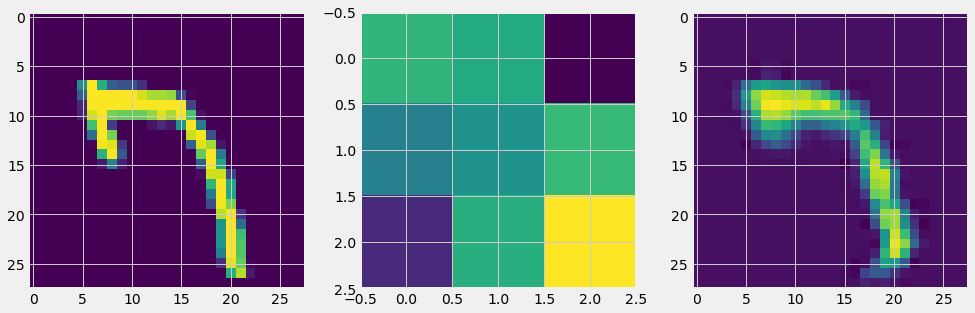

Epoch [19/20], Step [500/1875], Loss: 0.0152
Epoch [19/20], Step [1000/1875], Loss: 0.0151
Epoch [19/20], Step [1500/1875], Loss: 0.0160
Loss for epoch =  0.014531203203399977


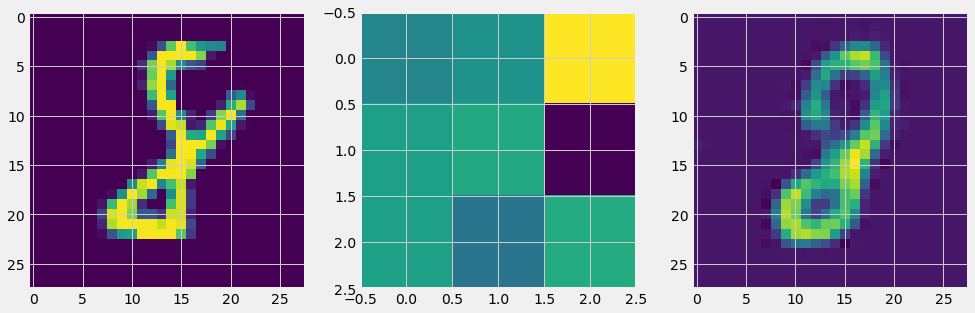

Epoch [20/20], Step [500/1875], Loss: 0.0140
Epoch [20/20], Step [1000/1875], Loss: 0.0180
Epoch [20/20], Step [1500/1875], Loss: 0.0142
Loss for epoch =  0.014458130673070748


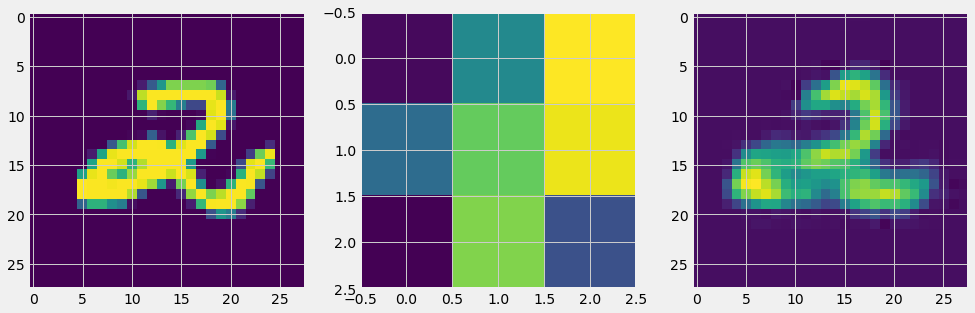

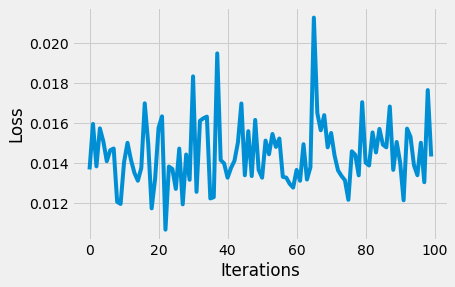

In [135]:
outputs = []
losses = []
total_step = len(loader)
for epoch in range(epochs):
    mse = []
    for i, (image, _) in enumerate(loader):
        # Output of Autoencoder
        reconstructed, encoded = model(image)

        # Calculating the loss function
        loss = loss_function(reconstructed, image)

        # The gradients are set to zero,
        # the the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mse.append(loss.item())
        # Storing the losses in a list for plotting
        losses.append(loss)
        if (i + 1) % 500 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, epochs, i + 1, total_step, loss.item()))
    outputs.append((epochs, image, reconstructed))
    fig, (ax1,ax2, ax3) = plt.subplots(ncols = 3, figsize = (15, 8))
    enc = encoded[-1].cpu()
    rec = reconstructed[-1].cpu()
    ax1.imshow(image[-1].reshape(28,28).cpu())
    ax2.imshow(enc.reshape(3,3).detach().numpy())
    ax3.imshow(rec.reshape(28,28).detach().numpy())
    print('Loss for epoch = ', sum(mse)/len(mse))
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

losses = torch.tensor(losses, device='cpu')
# Plotting the last 100 values
plt.plot(losses[-100:])
plt.show()

## Збереження моделі

In [136]:
torch.save(model.state_dict(),'convolutional_autoencoder.ckpt')
model.eval()

AE_conv(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (6): ReLU(inplace=True)
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=288, out_features=128, bias=True)
    (9): ReLU(inplace=True)
    (10): Linear(in_features=128, out_features=9, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=9, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=288, bias=True)
    (3): ReLU(inplace=True)
    (4): Unflatten(dim=1, unflattened_size=(32, 3, 3))
    (5): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (6): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, t

## Демонстрація енкодингу та декодингу

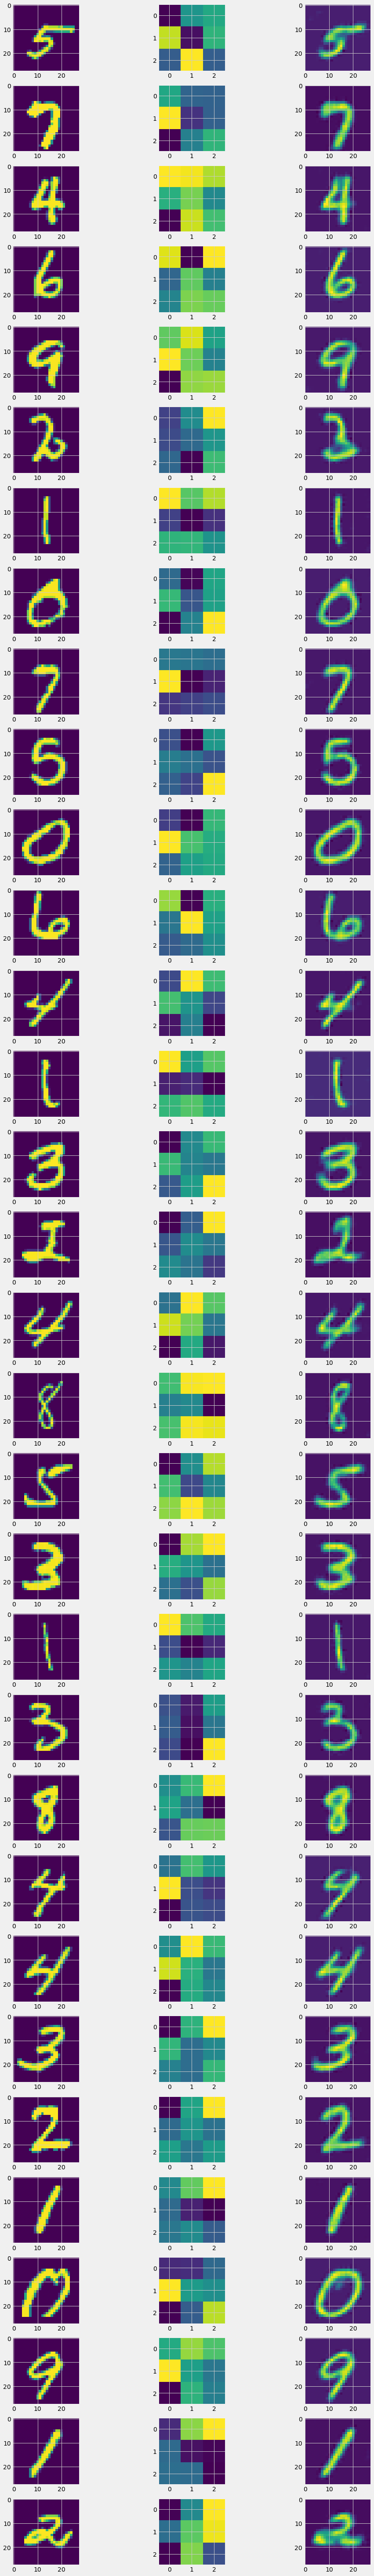

In [137]:
fig, ax = plt.subplots(nrows = len(image), ncols = 3, figsize = (15, 100))
mae = []
for i, item in enumerate(image):
  ax[i,0].imshow(item[0].cpu())
  item = item.unsqueeze(1)
  rec, enc = model(item)
  ax[i, 1].imshow(enc.reshape(3,3).cpu().detach().numpy())
  ax[i, 2].imshow(rec.reshape(28,28).cpu().detach().numpy())
  mae.append(mean_squared_error(item.reshape(-1, 28 * 28).cpu().detach().numpy(), rec.reshape(-1, 28 * 28).cpu().detach().numpy()))
MAE['mae_train'].append(sum(mae)/len(mae))
plt.show()

##  Тестування на власних числах написаних від руки

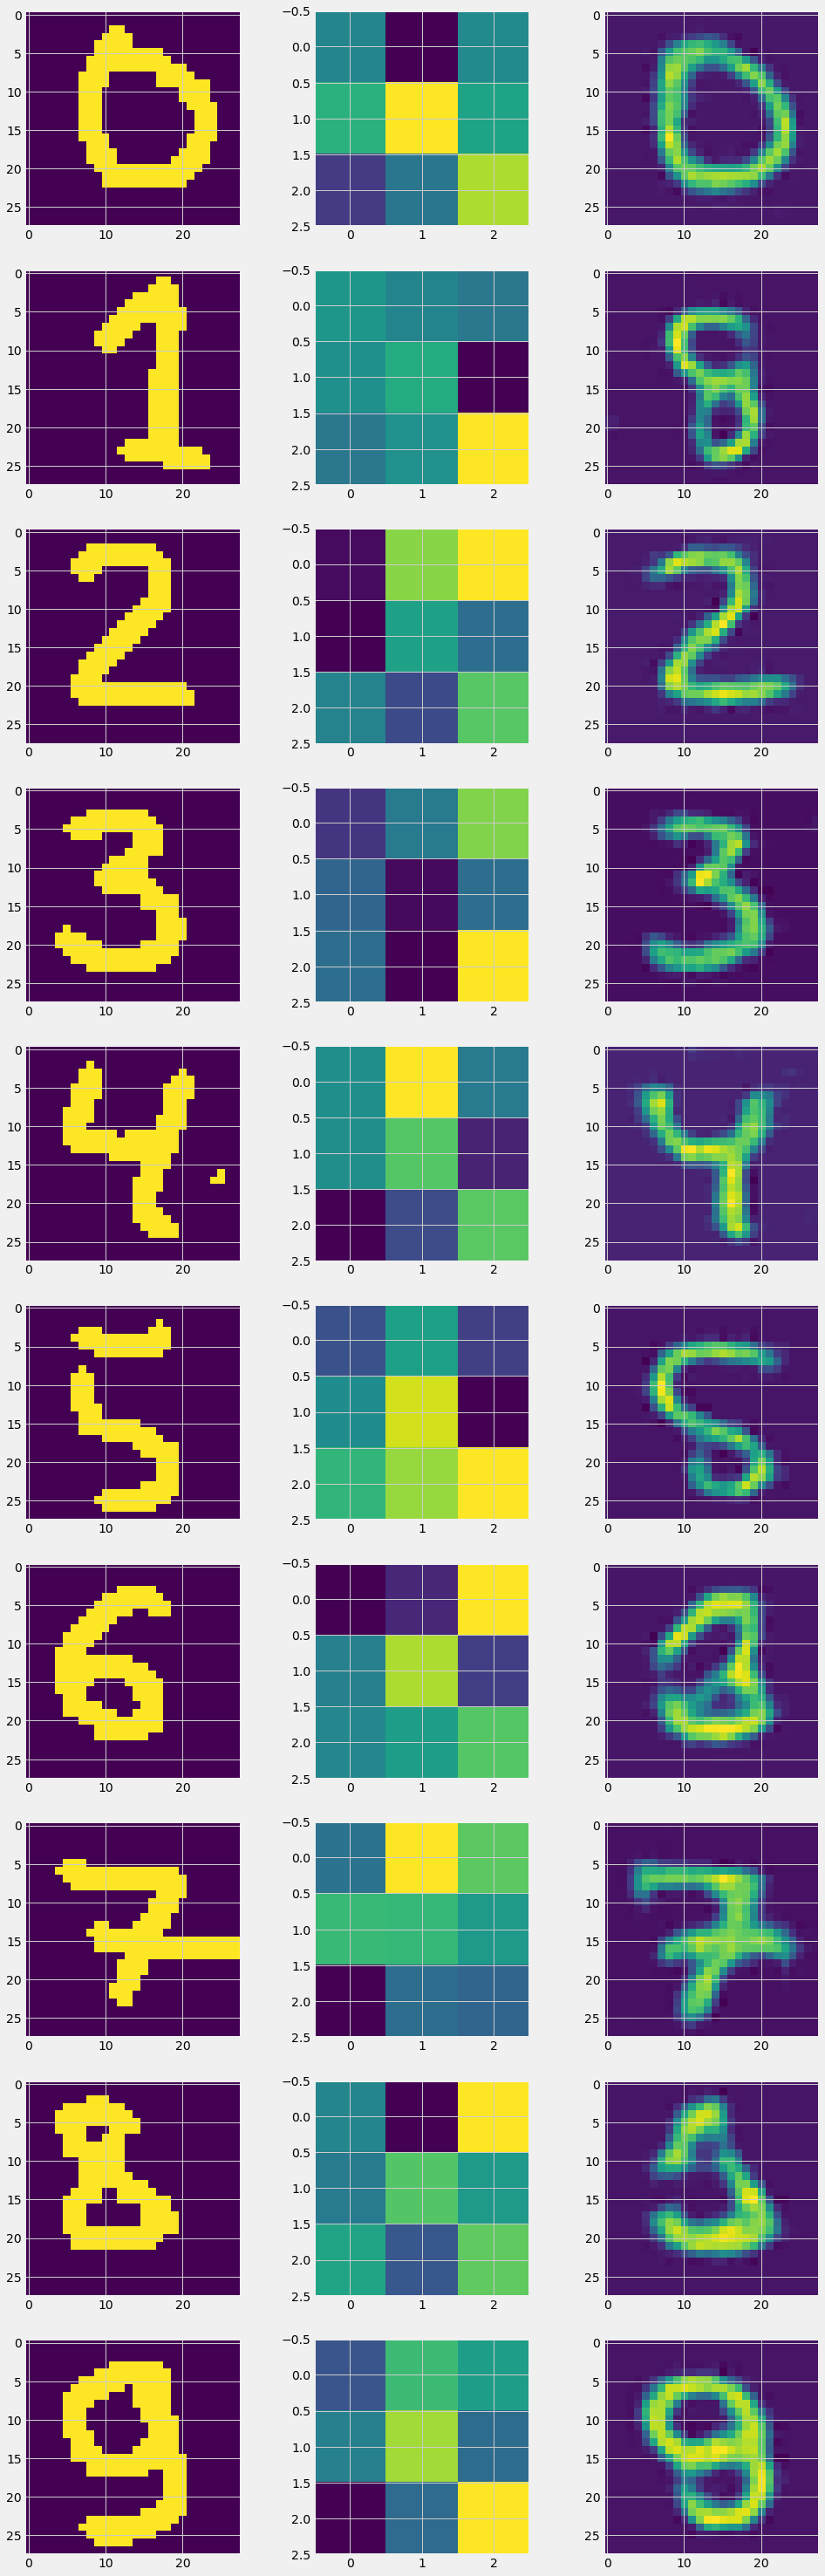

In [138]:
model = model.cpu()
mae = []
fig, ax = plt.subplots(nrows = len(test_numbers), ncols = 3, figsize = (15, 50))
for i, item in enumerate(test_numbers):
  image = torch.tensor(item)
  ax[i,0].imshow(image)
  image = image.unsqueeze(0)
  image = image.unsqueeze(0)
  rec, enc = model(image.float())
  ax[i, 1].imshow(enc.reshape(3,3).cpu().detach().numpy())
  ax[i, 2].imshow(rec.reshape(28,28).cpu().detach().numpy())
  mae.append(mean_squared_error(item.reshape(-1, 28 * 28), rec.reshape(-1, 28 * 28).cpu().detach().numpy()))
MAE['mae_test'].append(sum(mae)/len(mae))
plt.show()

#Варіаційний автоенкодер

## Проектування моделі

In [139]:
class VariationalEncoder(nn.Module):
    def __init__(self):  
        super(VariationalEncoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, stride=2, padding=1)
        self.batch2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 32, 3, stride=2, padding=0)  
        self.linear1 = nn.Linear(3*3*32, 128)
        self.linear2 = nn.Linear(128, 9)
        self.linear3 = nn.Linear(128, 9)

        self.N = torch.distributions.Normal(0, 1)
        self.N.loc = self.N.loc.cuda() # hack to get sampling on the GPU
        self.N.scale = self.N.scale.cuda()
        self.kl = 0

    def forward(self, x):
        x = x.to(device)
        x = F.relu(self.conv1(x))
        x = F.relu(self.batch2(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.linear1(x))
        mu =  self.linear2(x)
        sigma = torch.exp(self.linear3(x))
        z = mu + sigma*self.N.sample(mu.shape)
        self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
        return z      

class Decoder(nn.Module):
    
    def __init__(self):
        super().__init__()

        self.decoder_lin = nn.Sequential(
            nn.Linear(9, 128),
            nn.ReLU(True),
            nn.Linear(128, 3 * 3 * 32),
            nn.ReLU(True)
        )

        self.unflatten = nn.Unflatten(dim=1, unflattened_size=(32, 3, 3))

        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, output_padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 3, stride=2, padding=1, output_padding=1)
        )
        
    def forward(self, x):
        x = self.decoder_lin(x)
        x = self.unflatten(x)
        x = self.decoder_conv(x)
        x = torch.sigmoid(x)
        return x
class AE_variational(nn.Module):
    def __init__(self):
        super(AE_variational, self).__init__()
        self.encoder = VariationalEncoder()
        self.decoder = Decoder()

    def forward(self, x):
        x = x.to(device)
        z = self.encoder(x)
        return self.decoder(z), z

## Визначення функції втрат та оптимізатора

In [140]:
# Model Initialization
model = AE_variational()
model.to(device)
  
# Validation using MSE Loss function
def loss_function(decoded, real, model):
  return ((real - decoded)**2).sum() + model.encoder.kl

  
# Using an Adam Optimizer with lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-3,
                             weight_decay = 1e-8)

## Навчання

Epoch [1/20], Step [500/1875], Loss: 1674.6471
Epoch [1/20], Step [1000/1875], Loss: 1486.8942
Epoch [1/20], Step [1500/1875], Loss: 1442.4783
Loss for epoch =  1648.866046875


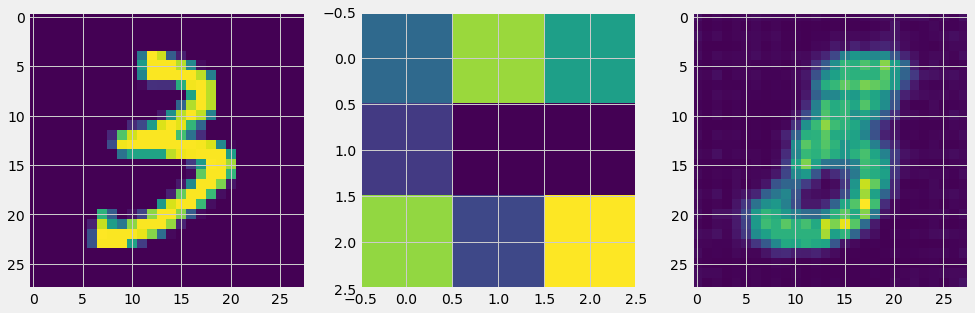

Epoch [2/20], Step [500/1875], Loss: 1270.4364
Epoch [2/20], Step [1000/1875], Loss: 1210.4148
Epoch [2/20], Step [1500/1875], Loss: 1120.0205
Loss for epoch =  1189.9952253255208


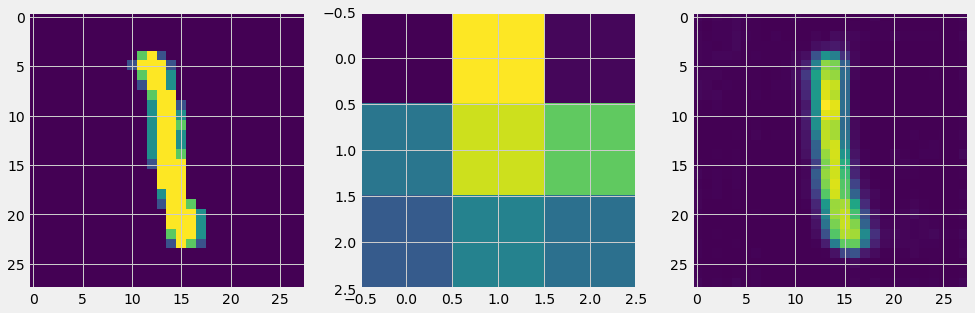

Epoch [3/20], Step [500/1875], Loss: 1108.9795
Epoch [3/20], Step [1000/1875], Loss: 1142.4585
Epoch [3/20], Step [1500/1875], Loss: 1081.7557
Loss for epoch =  1115.730408951823


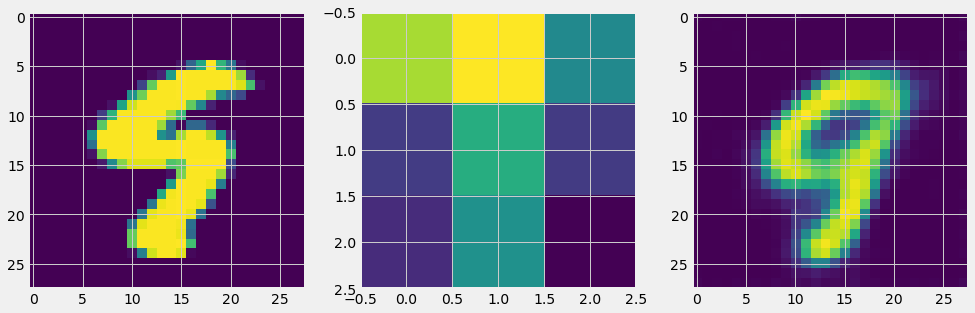

Epoch [4/20], Step [500/1875], Loss: 1070.9772
Epoch [4/20], Step [1000/1875], Loss: 1008.8630
Epoch [4/20], Step [1500/1875], Loss: 1189.8083
Loss for epoch =  1093.3466028645832


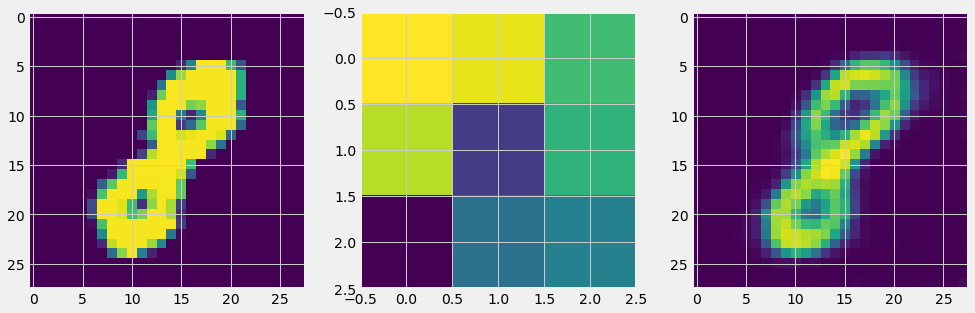

Epoch [5/20], Step [500/1875], Loss: 1202.5116
Epoch [5/20], Step [1000/1875], Loss: 1079.1085
Epoch [5/20], Step [1500/1875], Loss: 1034.6483
Loss for epoch =  1080.306712109375


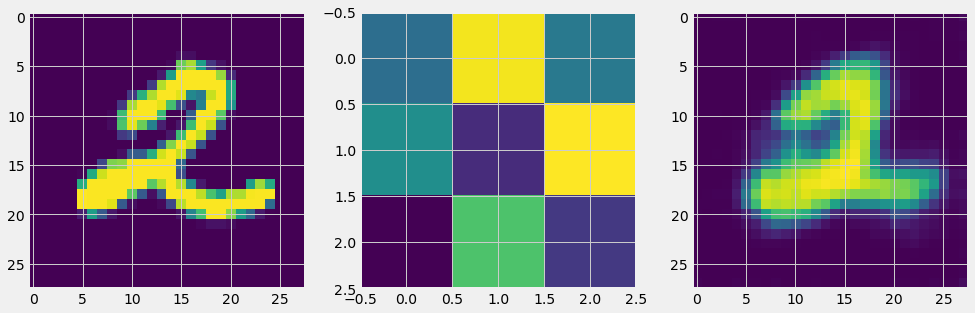

Epoch [6/20], Step [500/1875], Loss: 1084.2112
Epoch [6/20], Step [1000/1875], Loss: 1044.9410
Epoch [6/20], Step [1500/1875], Loss: 1037.1074
Loss for epoch =  1070.975813248698


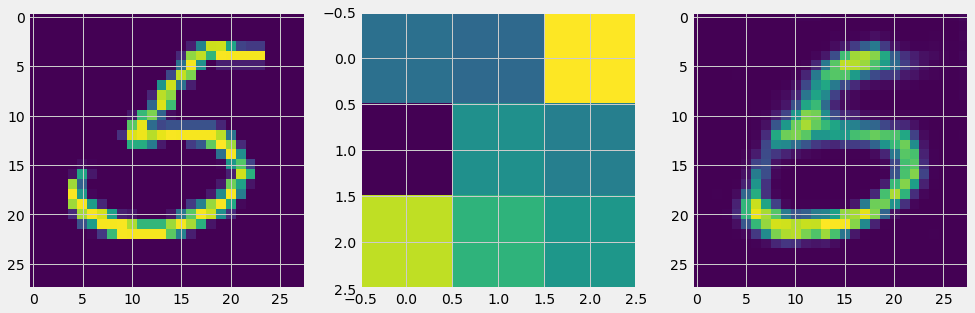

Epoch [7/20], Step [500/1875], Loss: 1042.6542
Epoch [7/20], Step [1000/1875], Loss: 1099.6370
Epoch [7/20], Step [1500/1875], Loss: 1013.8242
Loss for epoch =  1063.3077477539061


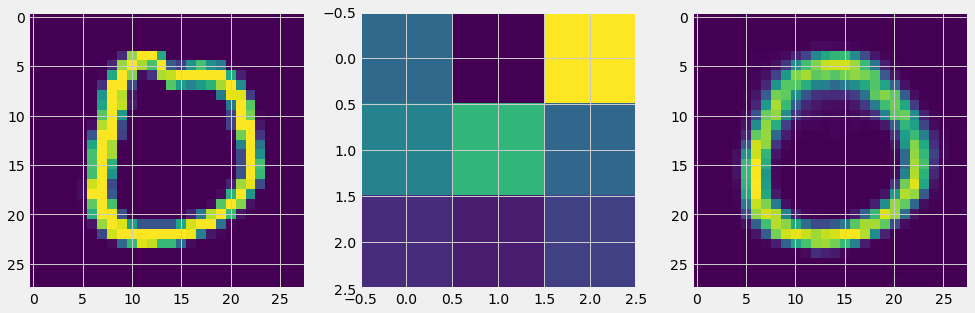

Epoch [8/20], Step [500/1875], Loss: 1108.6377
Epoch [8/20], Step [1000/1875], Loss: 994.0013
Epoch [8/20], Step [1500/1875], Loss: 988.7413
Loss for epoch =  1057.5271282226563


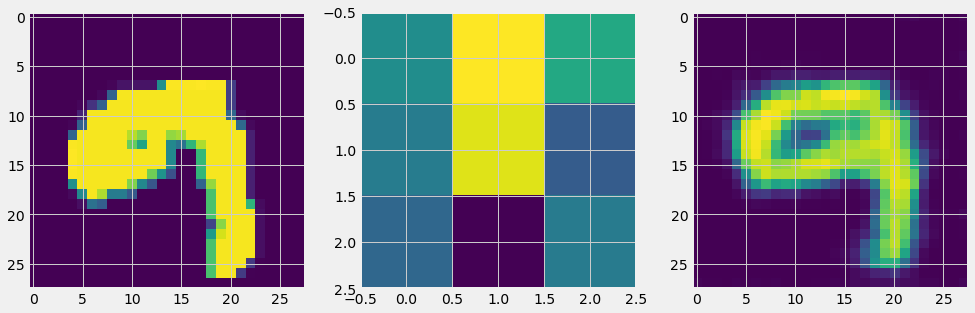

Epoch [9/20], Step [500/1875], Loss: 1134.5530
Epoch [9/20], Step [1000/1875], Loss: 1022.8137
Epoch [9/20], Step [1500/1875], Loss: 1039.5566
Loss for epoch =  1053.4236180989583


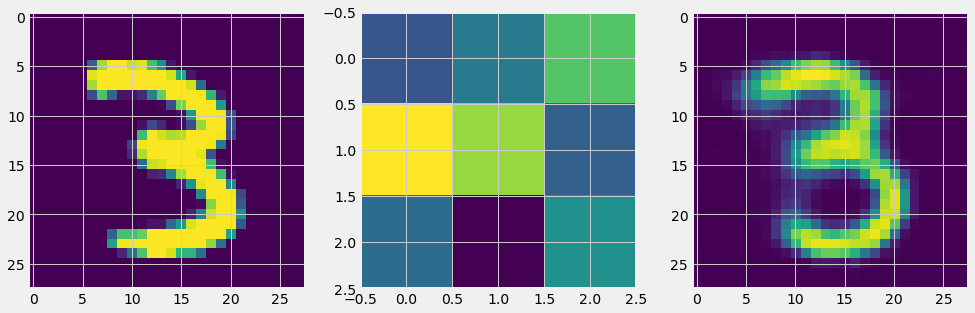

Epoch [10/20], Step [500/1875], Loss: 1081.8368
Epoch [10/20], Step [1000/1875], Loss: 999.7448
Epoch [10/20], Step [1500/1875], Loss: 1065.8726
Loss for epoch =  1048.3054181640625


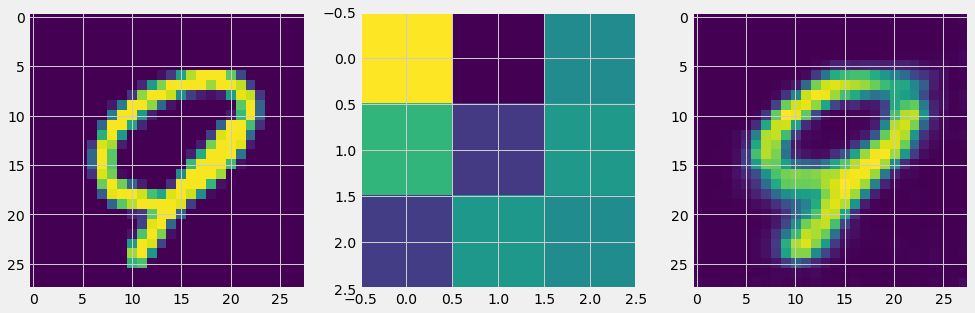

Epoch [11/20], Step [500/1875], Loss: 1151.8950
Epoch [11/20], Step [1000/1875], Loss: 1008.3718
Epoch [11/20], Step [1500/1875], Loss: 1013.3347
Loss for epoch =  1045.8783705078124


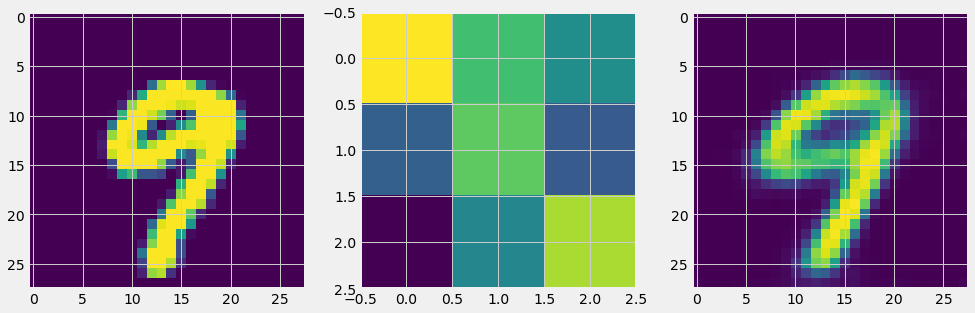

Epoch [12/20], Step [500/1875], Loss: 1078.6909
Epoch [12/20], Step [1000/1875], Loss: 941.3621
Epoch [12/20], Step [1500/1875], Loss: 1030.3783
Loss for epoch =  1042.9640938476562


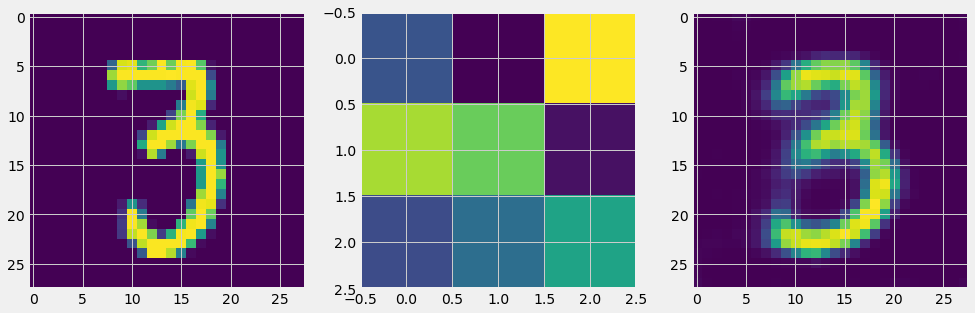

Epoch [13/20], Step [500/1875], Loss: 1069.4695
Epoch [13/20], Step [1000/1875], Loss: 1036.1422
Epoch [13/20], Step [1500/1875], Loss: 1014.1532
Loss for epoch =  1040.0348643880209


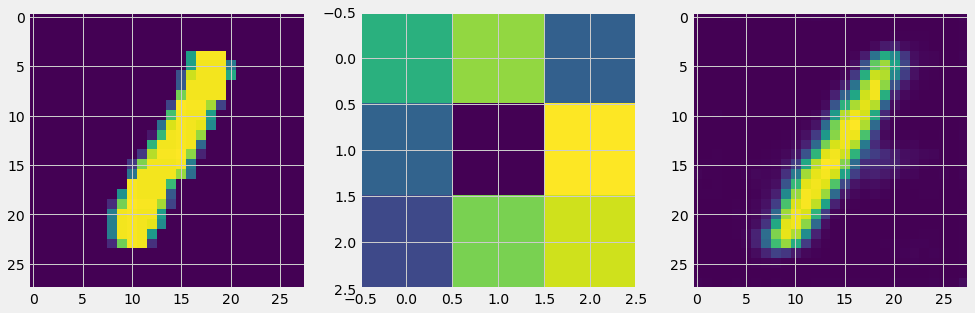

Epoch [14/20], Step [500/1875], Loss: 983.0020
Epoch [14/20], Step [1000/1875], Loss: 1008.9209
Epoch [14/20], Step [1500/1875], Loss: 1012.5833
Loss for epoch =  1037.420971484375


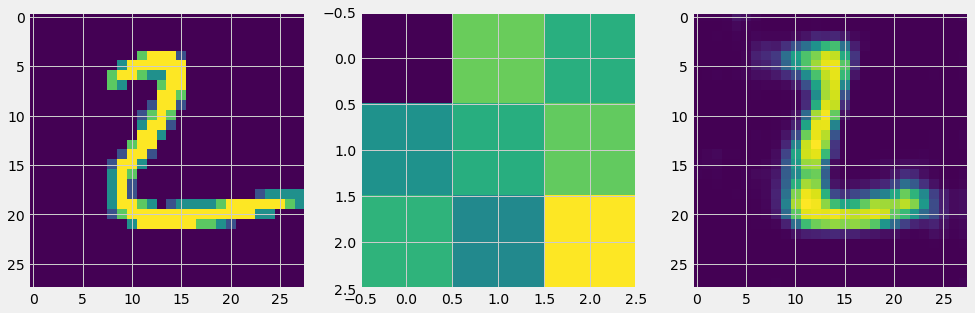

Epoch [15/20], Step [500/1875], Loss: 1026.5459
Epoch [15/20], Step [1000/1875], Loss: 1015.2593
Epoch [15/20], Step [1500/1875], Loss: 992.7526
Loss for epoch =  1035.4203639973957


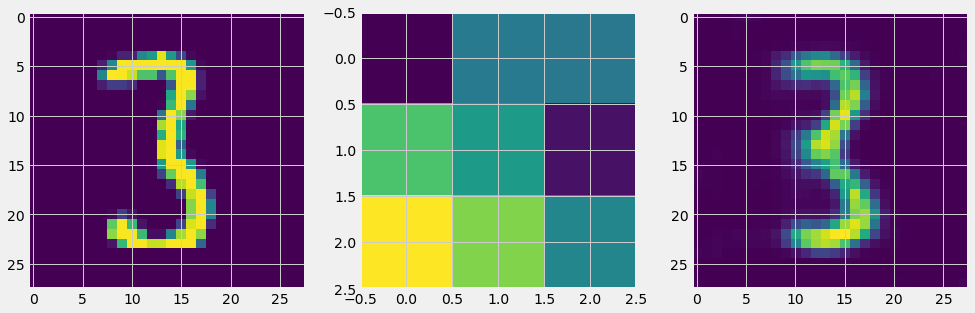

Epoch [16/20], Step [500/1875], Loss: 1057.0728
Epoch [16/20], Step [1000/1875], Loss: 1008.8789
Epoch [16/20], Step [1500/1875], Loss: 1023.1945
Loss for epoch =  1032.9665364583334


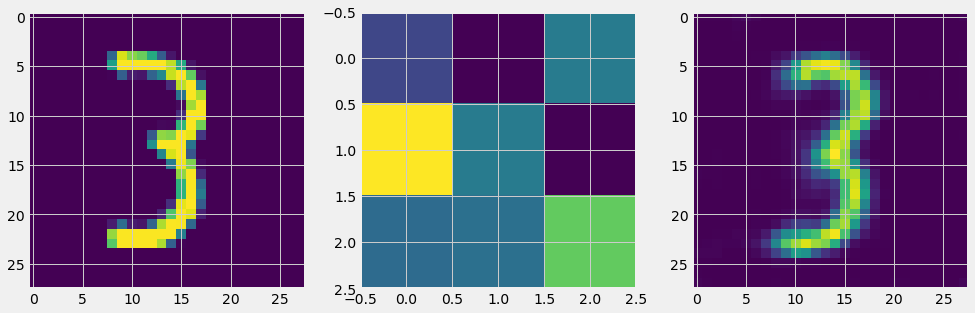

Epoch [17/20], Step [500/1875], Loss: 996.4786
Epoch [17/20], Step [1000/1875], Loss: 970.9841
Epoch [17/20], Step [1500/1875], Loss: 1021.9291
Loss for epoch =  1030.8260959309896


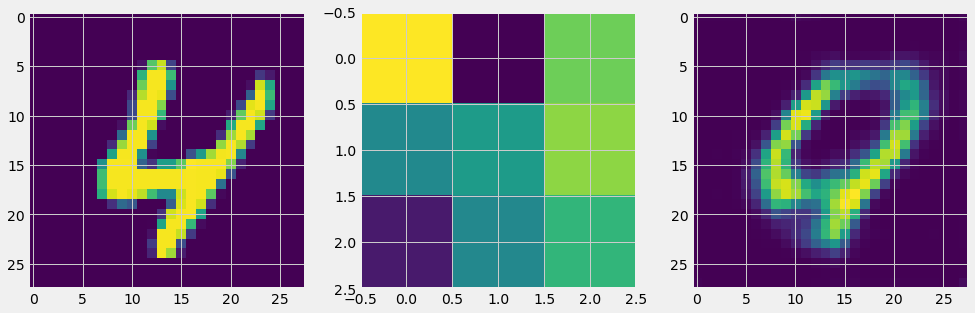

Epoch [18/20], Step [500/1875], Loss: 1004.8204
Epoch [18/20], Step [1000/1875], Loss: 1031.9614
Epoch [18/20], Step [1500/1875], Loss: 1002.2083
Loss for epoch =  1029.563348860677


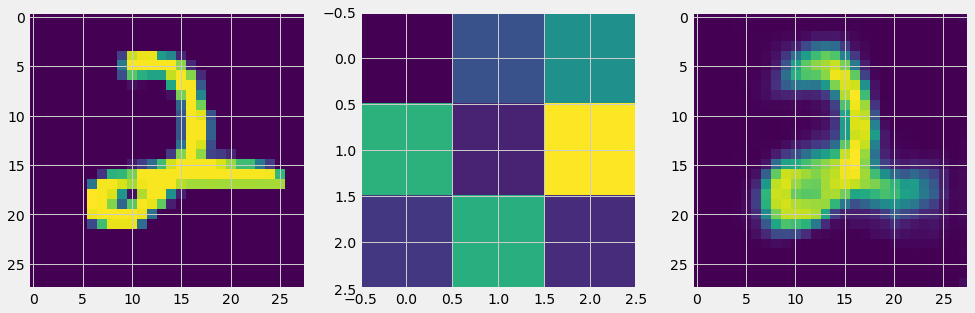

Epoch [19/20], Step [500/1875], Loss: 1011.7110
Epoch [19/20], Step [1000/1875], Loss: 1006.6922
Epoch [19/20], Step [1500/1875], Loss: 1007.3636
Loss for epoch =  1027.9884197265626


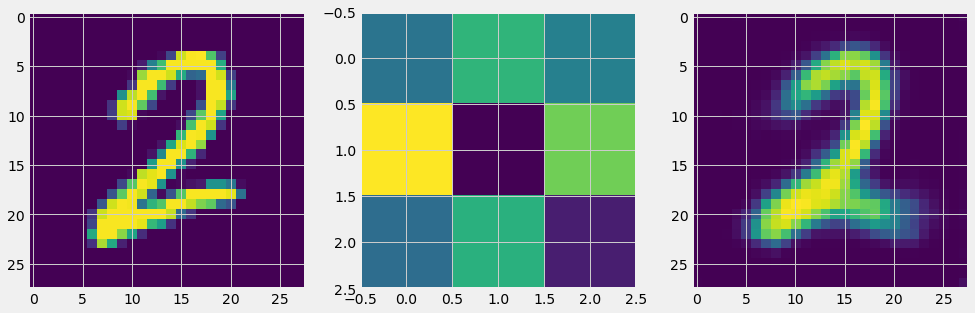

Epoch [20/20], Step [500/1875], Loss: 1090.9517
Epoch [20/20], Step [1000/1875], Loss: 1092.3413
Epoch [20/20], Step [1500/1875], Loss: 922.0785
Loss for epoch =  1026.5254666341145


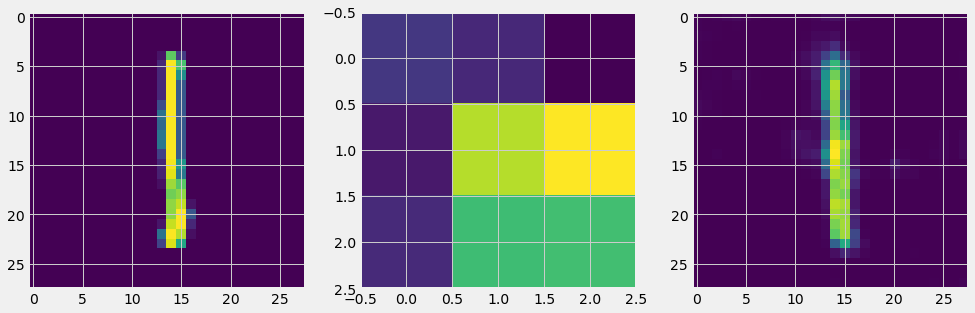

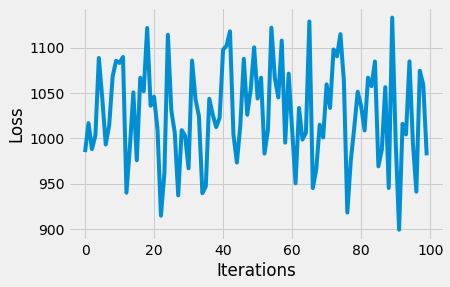

In [141]:
outputs = []
losses = []
total_step = len(loader)
for epoch in range(epochs):
    mse = []
    for i, (image, _) in enumerate(loader):
        # Output of Autoencoder
        reconstructed, encoded = model(image)

        # Calculating the loss function
        loss = loss_function(reconstructed, image, model)

        # The gradients are set to zero,
        # the the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mse.append(loss.item())
        # Storing the losses in a list for plotting
        losses.append(loss)
        if (i + 1) % 500 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, epochs, i + 1, total_step, loss.item()))
    outputs.append((epochs, image, reconstructed))
    fig, (ax1,ax2, ax3) = plt.subplots(ncols = 3, figsize = (15, 8))
    enc = encoded[-1].cpu()
    rec = reconstructed[-1].cpu()
    ax1.imshow(image[-1].reshape(28,28).cpu())
    ax2.imshow(enc.reshape(3,3).detach().numpy())
    ax3.imshow(rec.reshape(28,28).detach().numpy())
    print('Loss for epoch = ', sum(mse)/len(mse))
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

losses = torch.tensor(losses, device='cpu')
# Plotting the last 100 values
plt.plot(losses[-100:])
plt.show()

## Збереження моделі

In [142]:
torch.save(model.state_dict(),'variational_autoencoder.ckpt')
model.eval()

AE_variational(
  (encoder): VariationalEncoder(
    (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (batch2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (linear1): Linear(in_features=288, out_features=128, bias=True)
    (linear2): Linear(in_features=128, out_features=9, bias=True)
    (linear3): Linear(in_features=128, out_features=9, bias=True)
  )
  (decoder): Decoder(
    (decoder_lin): Sequential(
      (0): Linear(in_features=9, out_features=128, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=128, out_features=288, bias=True)
      (3): ReLU(inplace=True)
    )
    (unflatten): Unflatten(dim=1, unflattened_size=(32, 3, 3))
    (decoder_conv): Sequential(
      (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(16

## Демонстрація енкодингу та декодингу

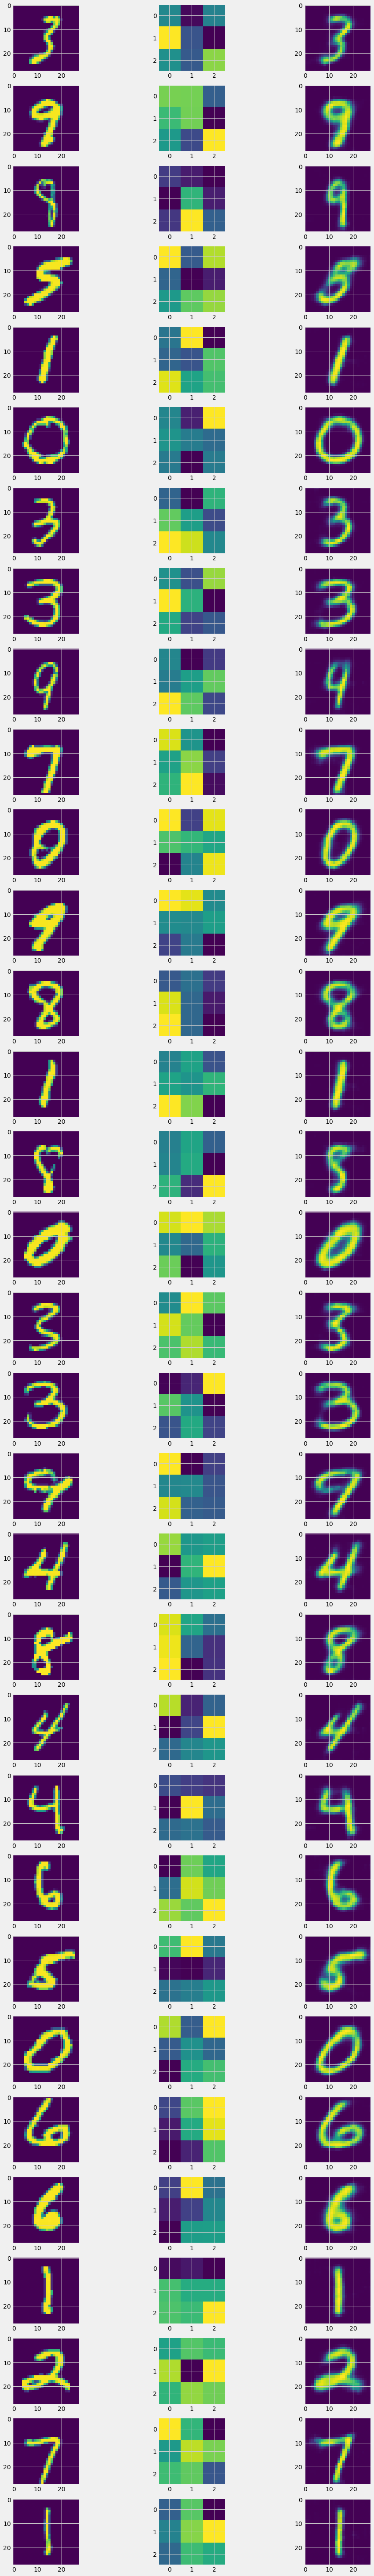

In [143]:
fig, ax = plt.subplots(nrows = len(image), ncols = 3, figsize = (15, 100))
mae = []
for i, item in enumerate(image):
  ax[i,0].imshow(item[0].cpu())
  item = item.unsqueeze(1)
  rec, enc = model(item)
  ax[i, 1].imshow(enc.reshape(3,3).cpu().detach().numpy())
  ax[i, 2].imshow(rec.reshape(28,28).cpu().detach().numpy())
  mae.append(mean_squared_error(item.reshape(-1, 28 * 28).cpu().detach().numpy(), rec.reshape(-1, 28 * 28).cpu().detach().numpy()))
MAE['mae_train'].append(sum(mae)/len(mae))
plt.show()

##  Тестування на власних числах написаних від руки

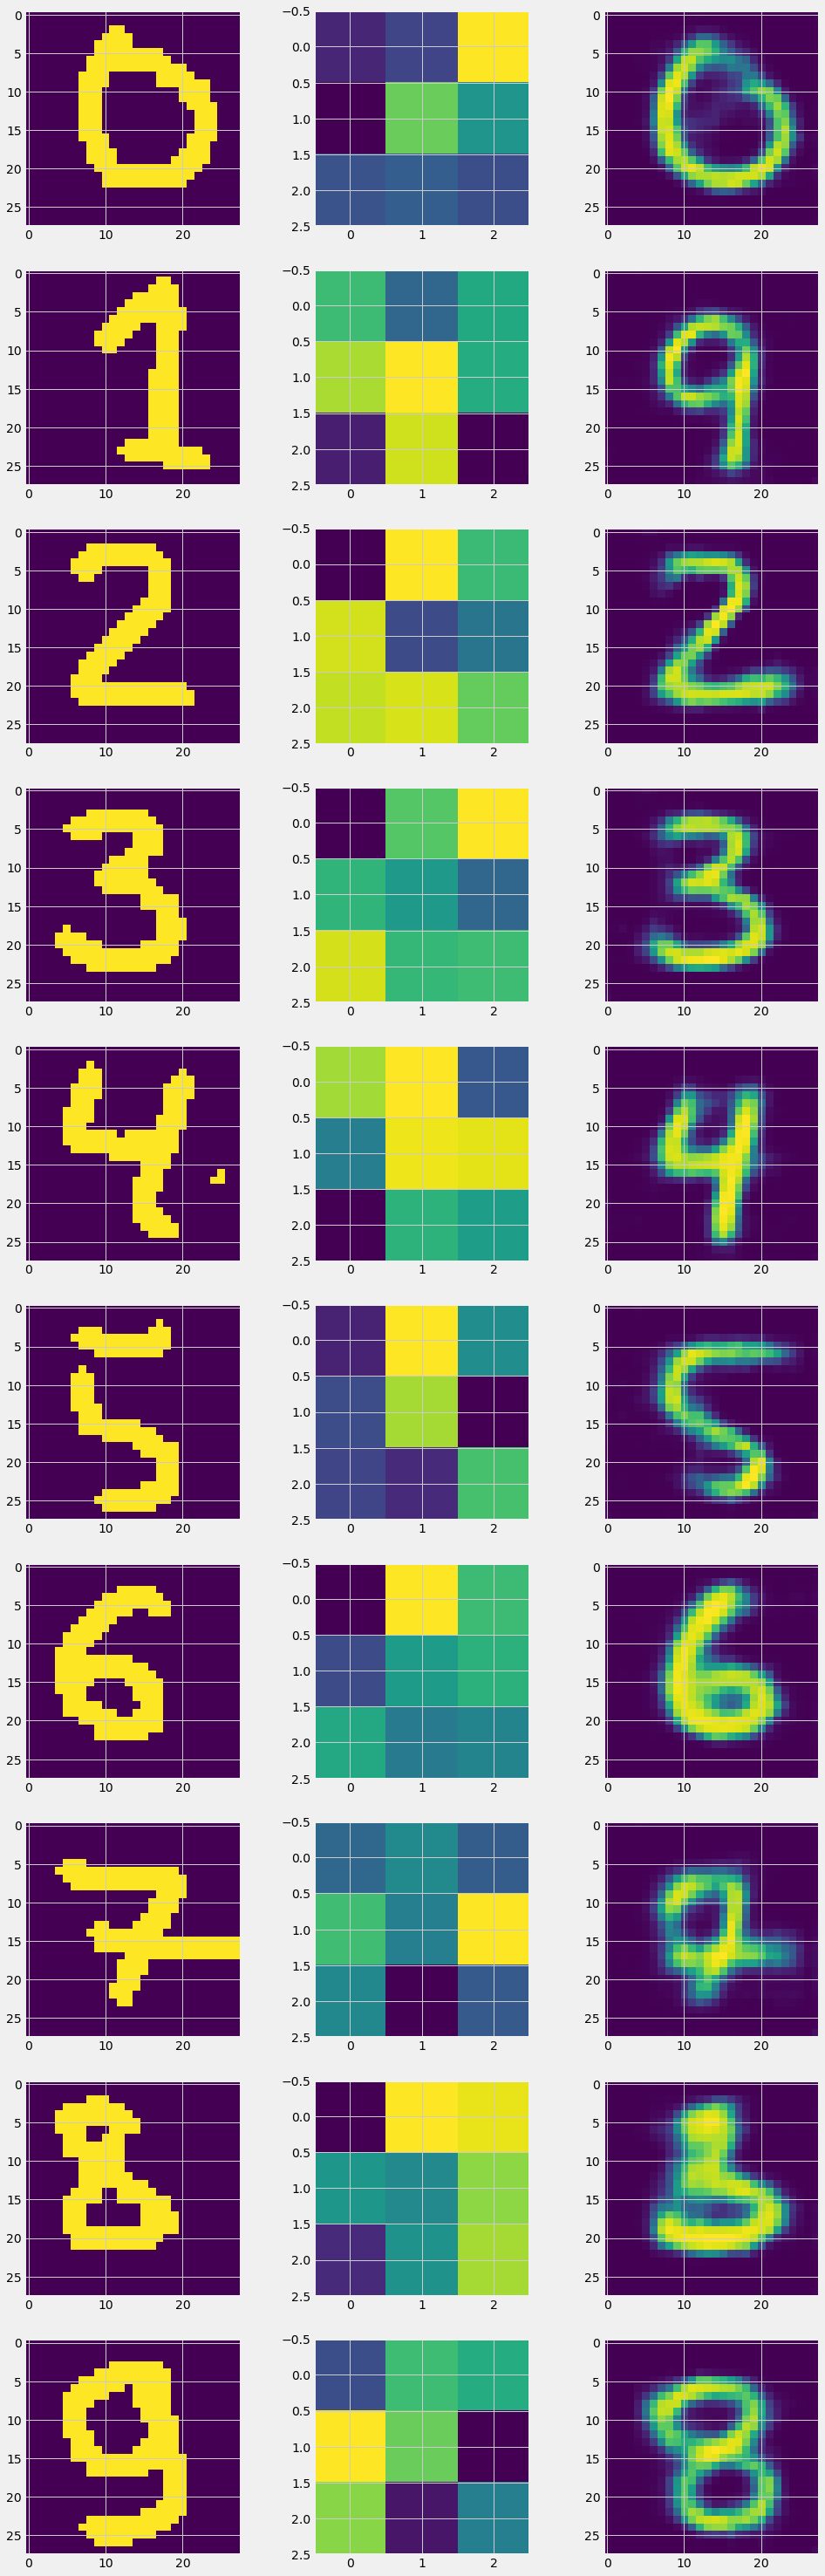

In [144]:
mae = []
fig, ax = plt.subplots(nrows = len(test_numbers), ncols = 3, figsize = (15, 50))
for i, item in enumerate(test_numbers):
  image = torch.tensor(item, device = 'cpu')
  ax[i,0].imshow(image)
  image = image.unsqueeze(0)
  image = image.unsqueeze(0)
  rec, enc = model(image.float())
  ax[i, 1].imshow(enc.reshape(3,3).cpu().detach().numpy())
  ax[i, 2].imshow(rec.reshape(28,28).cpu().detach().numpy())
  mae.append(mean_squared_error(item.reshape(-1, 28 * 28), rec.reshape(-1, 28 * 28).cpu().detach().numpy()))
MAE['mae_test'].append(sum(mae)/len(mae))
plt.show()

# Порівняння автоенкодерів

In [145]:
pd.DataFrame({'MSE on train': MAE['mae_train'], 'MSE on test': MAE['mae_test']}, index = ['Персептрон', 'Згортковий', 'Варіаційний'])

,MSE on train,MSE on test
Персептрон,0.020042,0.098365
Згортковий,0.013968,0.090034
Варіаційний,0.021845,0.107767
